# UF-ECT Setup Framework Examples
This notebook contains examples of the setup framework described in Price-Broncucia et al, 2024. Most of the figures in the paper can be produced directly using data in the repository and this notebook.

In [39]:
from importlib import reload
import new_model_routine

reload(new_model_routine)

from new_model_routine import *

# CESM 2 Degree

# CESM 2deg on Derecho

## Step 1: Generate Experimental Ensemble Summary Files
This first step of the setup framework involves generating a large experimental ensemble to test with. This process will be the most model dependent as the particular way to create ensembles will depend on each model. An example of a program to generate an ensemble for MPAS-A is included in the PyCECT repository for reference. CESM ensemble generation can be found in the CESM and associated repositories. After runs are created, spatial means can be calculated with the ECT code for each timeslice (example found in `MPAS/mpas_430_pyEnsSumMPAS.sh`).

In [14]:
twodeg_folder = "../data/CESM_2_3_2750_2deg_sums"
twodeg_file_prefix = "cesm23_2750_2deg_sum_"
twodeg_file_suffix = ""

## Step 2: Summary Files
With summary files created they should be read in. 

### This finds which variables were shared across the timeseries, and creates an array of timesteps taking into account the save frequency and first save file (in case the first save file is not the IC's).

In [15]:
# This set does not include initial conditions
twodeg_all_standard_means, twodeg_timesteps, twodeg_shared_vars = read_summary_series(
    twodeg_folder, twodeg_file_prefix, twodeg_file_suffix, 1, 1
)

0: 262 vars
1: 259 vars
2: 270 vars
3: 255 vars
4: 270 vars
5: 255 vars
6: 270 vars
7: 255 vars
8: 270 vars
9: 255 vars
10: 269 vars
11: 255 vars
12: 269 vars
13: 254 vars
14: 269 vars
15: 254 vars
16: 269 vars
17: 254 vars
237 shared variables


## Step 3: Determine Appropriate Timeslice
Use Shapiro-Wilk P-score over time to determine an appropriate timeslice.

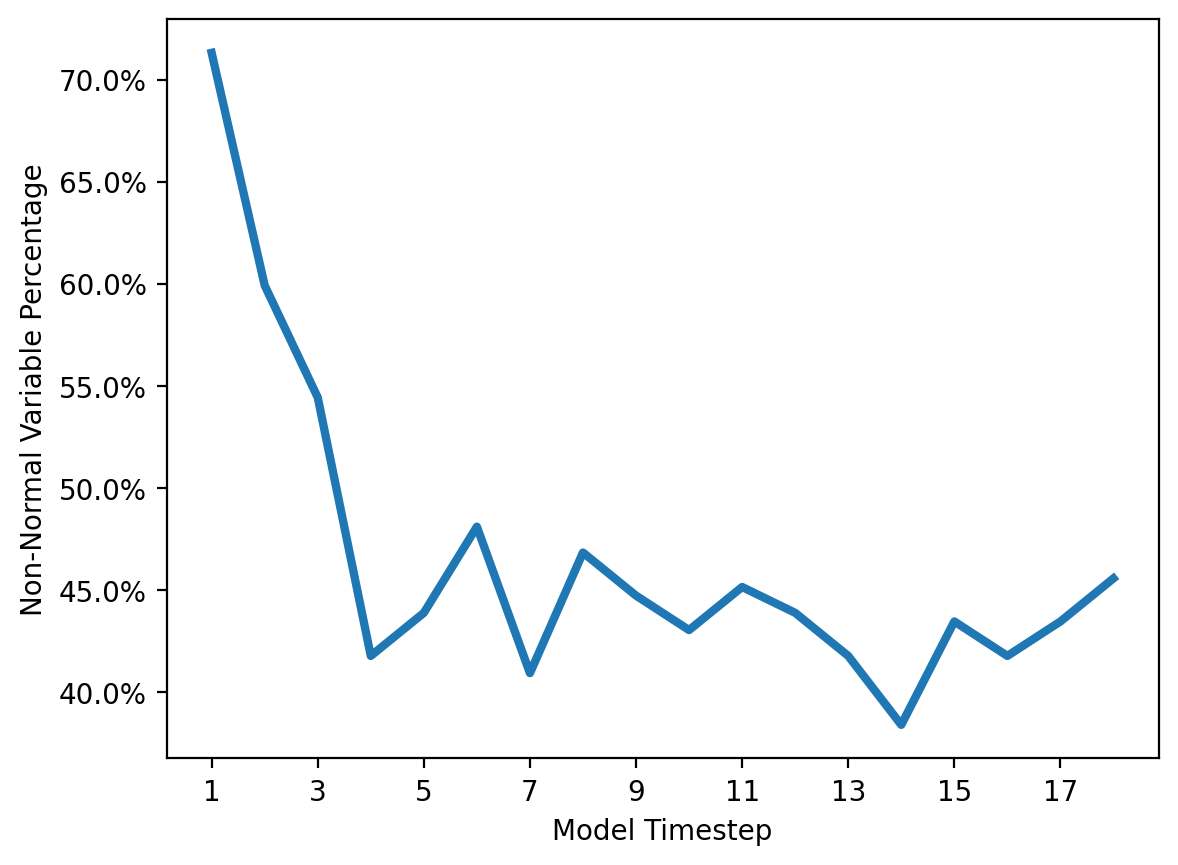

In [49]:
twodeg_shapiro_timesteps, twodeg_non_normal_vars_percentage = shapiro_wilks_over_time(
    twodeg_all_standard_means, twodeg_timesteps, twodeg_shared_vars
)

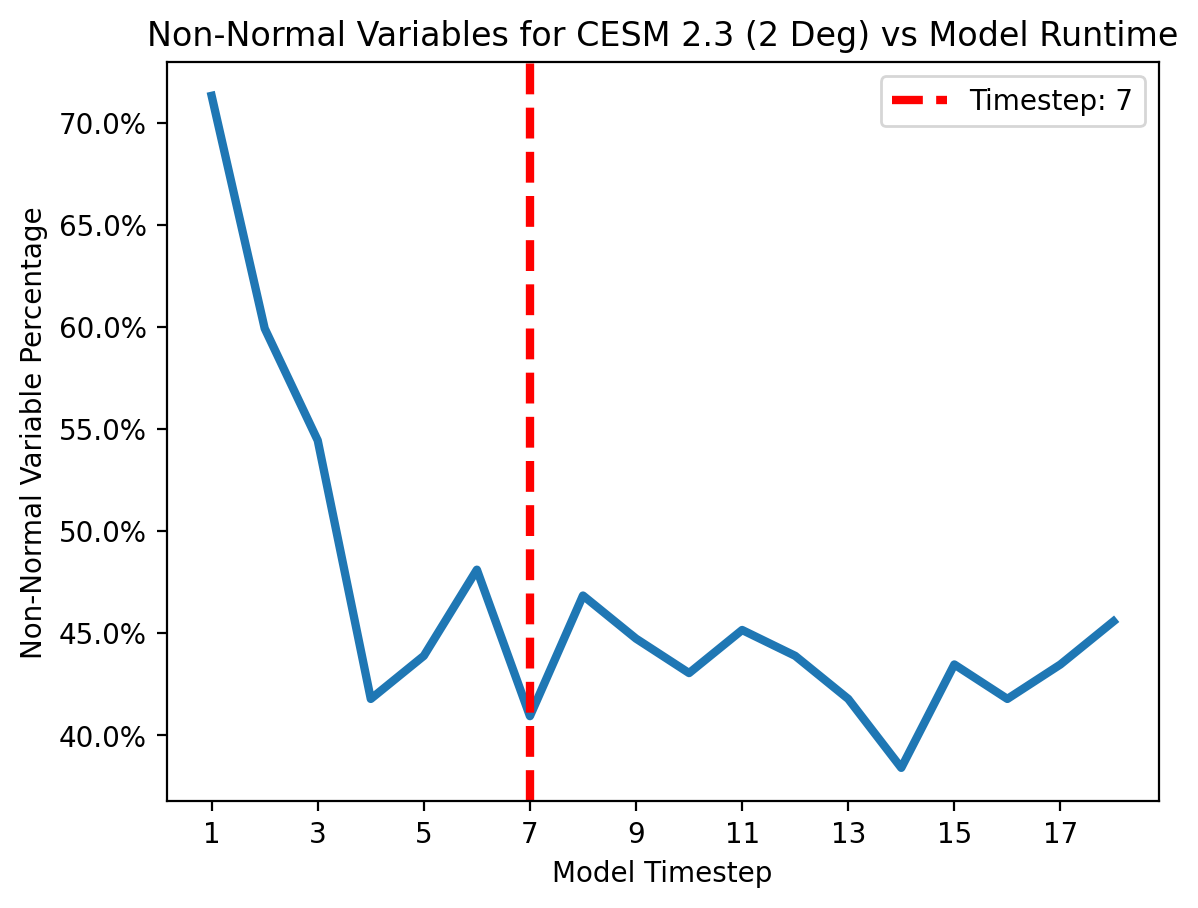

In [50]:
title = "Non-Normal Variables for CESM 2.3 (2 Deg) vs Model Runtime"
mark_timestep = 7
plot_shapiro_wilks_over_time(
    twodeg_shapiro_timesteps,
    twodeg_non_normal_vars_percentage,
    title=title,
    mark_timestep=mark_timestep,
)

## Step 4, Determine Number of PC Dimensions to Use
Determine the required number of PC dimensions by increasing ensemble size until estimate of PCs required to explain 95% of the variance stabilizes.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
[104, 109, 112, 115, 117, 119, 120, 122, 123, 124, 124, 125, 126, 126, 127, 127, 128, 128, 128, 128, 129, 129, 129, 129, 130, 130, 130, 130, 130]


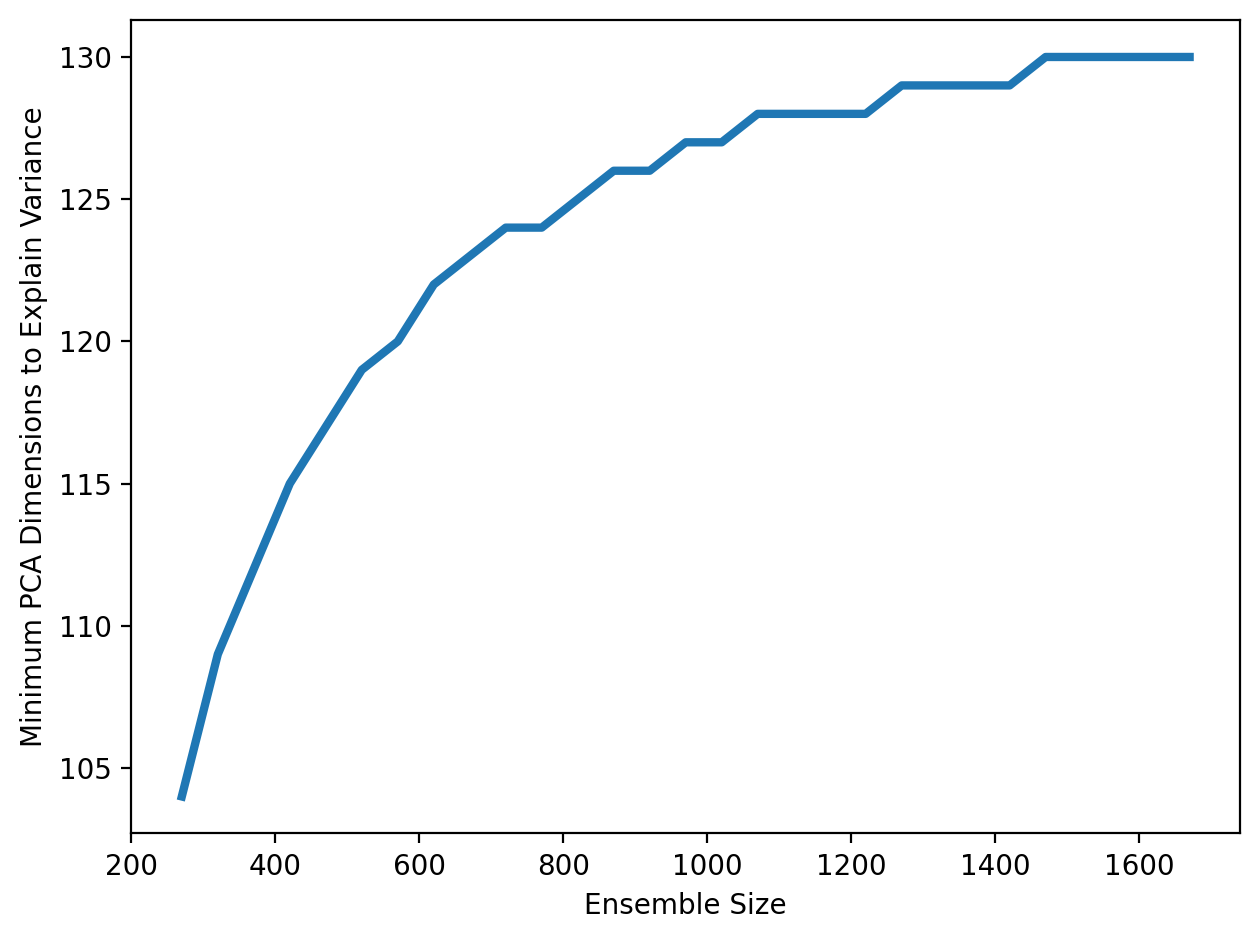

In [4]:
sample_sizes, min_pca_included = stable_PCs_required(
    twodeg_folder, twodeg_file_prefix, '', 7, twodeg_timesteps, 0.95
)

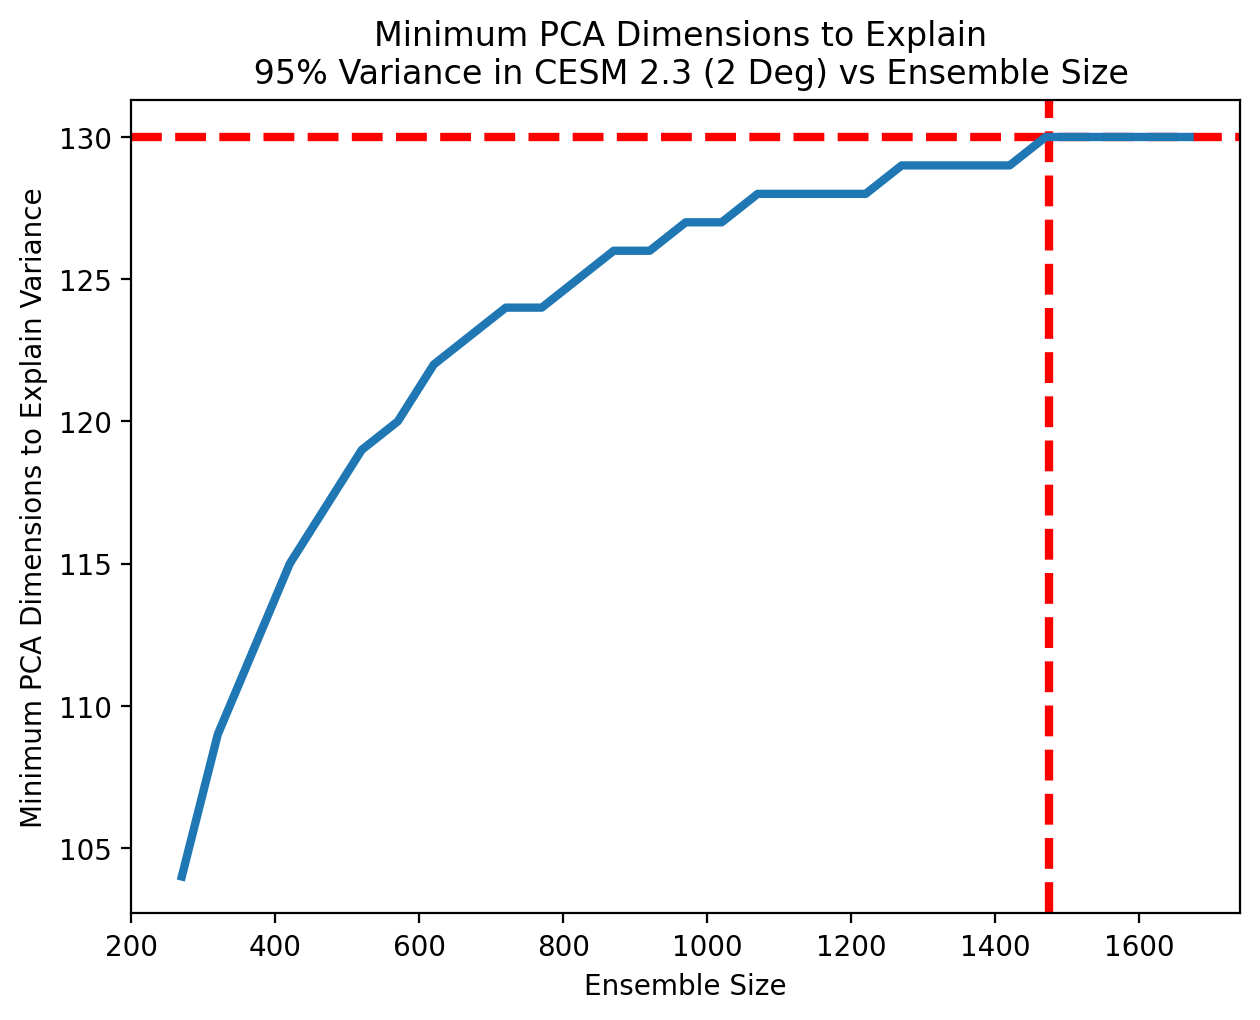

In [13]:
title = "Minimum PCA Dimensions to Explain \n 95% Variance in CESM 2.3 (2 Deg) vs Ensemble Size"
plot_stable_PCs(
    sample_sizes, min_pca_included, vertical_line=1475, horizontal_line=130, title=title
)

## Step 5, Determine if $m_\sigma$ Needs to be Adjusted
By calculating the theoretical minimum false positive rate at the selected number of PCs, we can adjust $m_\sigma$ using a heuristic if needed.

In [35]:
new_m = find_theoretical_m(130, 0.002)
new_m

2.237237930493945

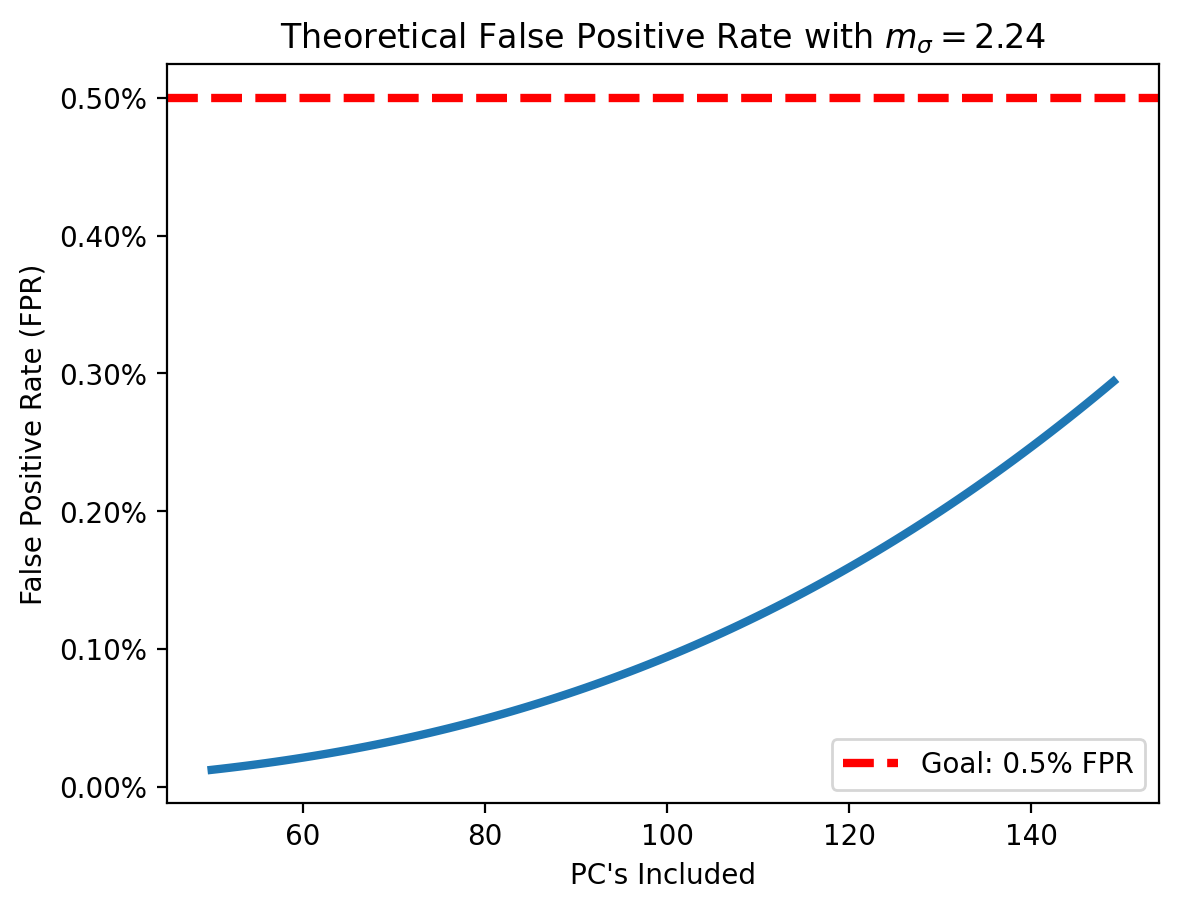

In [41]:
theorectical_fpr_high = theoretical_fpr_range(50, 150, new_m)
pca_vals = list(range(50, 150))
plt.plot(pca_vals, theorectical_fpr_high)
plt.axhline(y=0.005, label="Goal: 0.5% FPR", color="red", linestyle="dashed")
plt.title(fr"Theoretical False Positive Rate with $m_\sigma = {new_m:.2f}$")
plt.xlabel("PC's Included")
plt.ylabel("False Positive Rate (FPR)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()
plt.show()

## Step 6: Ensure Ensemble Size is Sufficient for FPR
Test the false positive rate at increasing ensemble sizes to determine if it yields a suffieciently low FPR.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


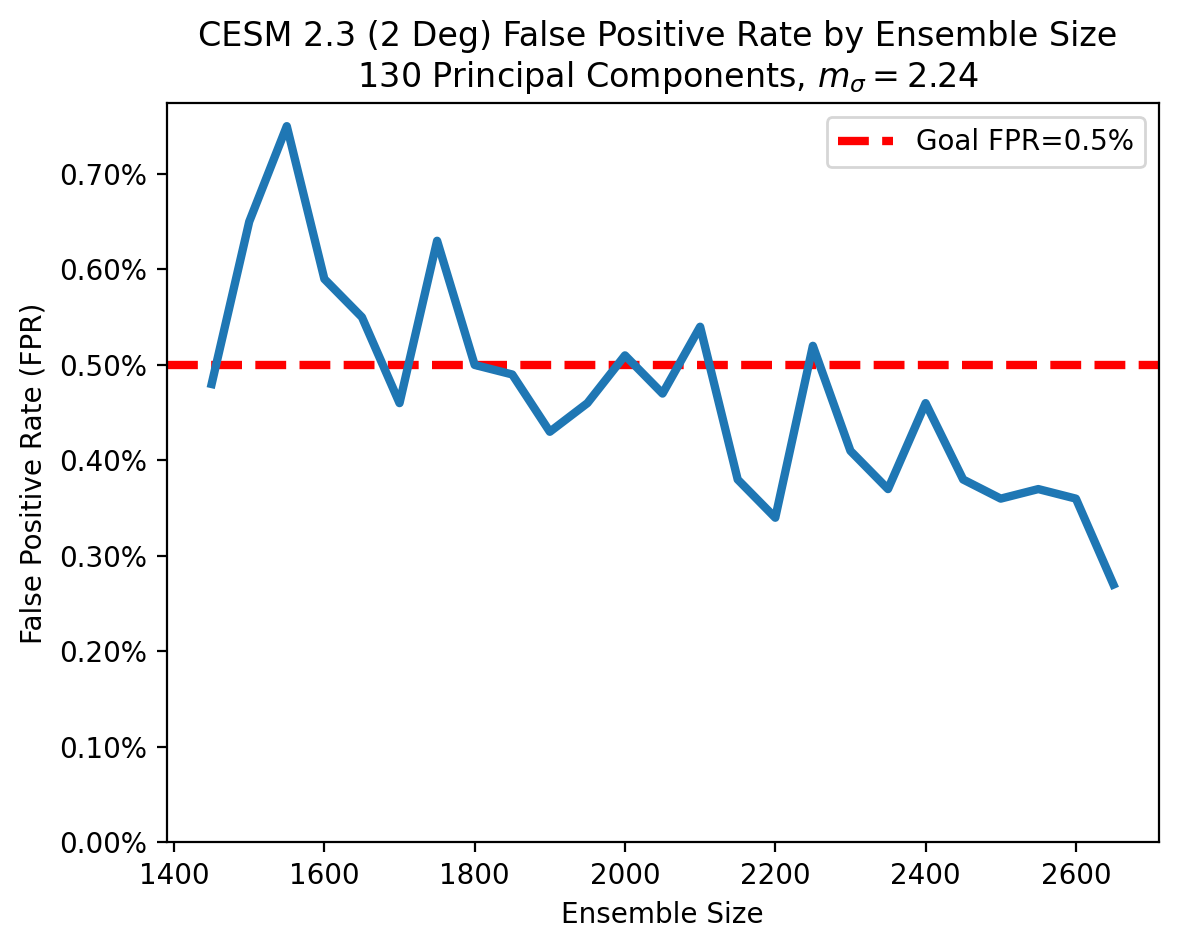

In [29]:
title = f"CESM 2.3 (2 Deg) False Positive Rate by Ensemble Size \n 130 Principal Components, $m_\\sigma = {new_m:.2f}$"
twodeg_sample_sizes, twodeg_fpr_by_ensemble_size = run_fpr_tests(
    twodeg_folder, twodeg_file_prefix, '', 7, twodeg_timesteps, 130, 1450, new_m, title=title
)

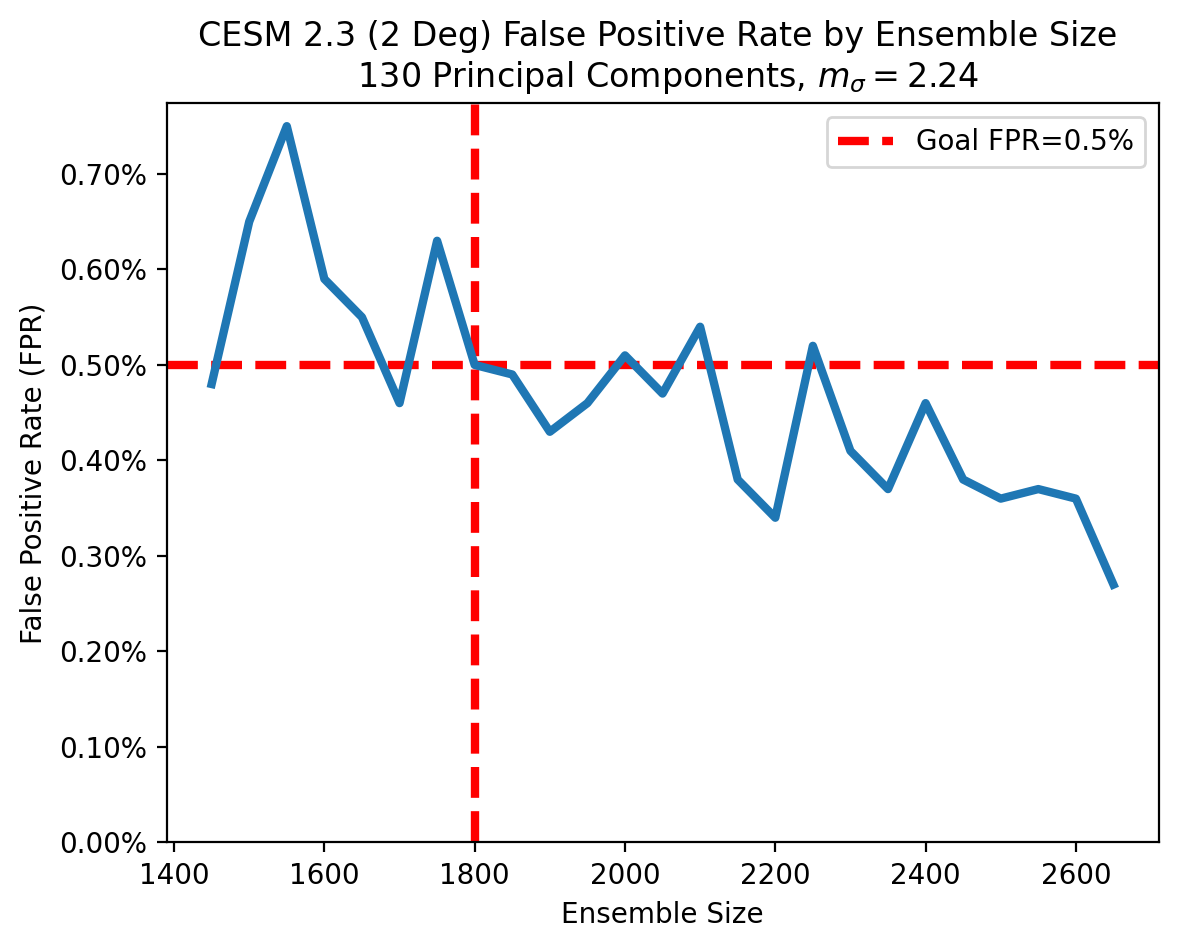

In [30]:
title = f"CESM 2.3 (2 Deg) False Positive Rate by Ensemble Size \n 130 Principal Components, $m_\\sigma = {new_m:.2f}$"
plot_fpr_tests(twodeg_sample_sizes, twodeg_fpr_by_ensemble_size, title, 1800)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


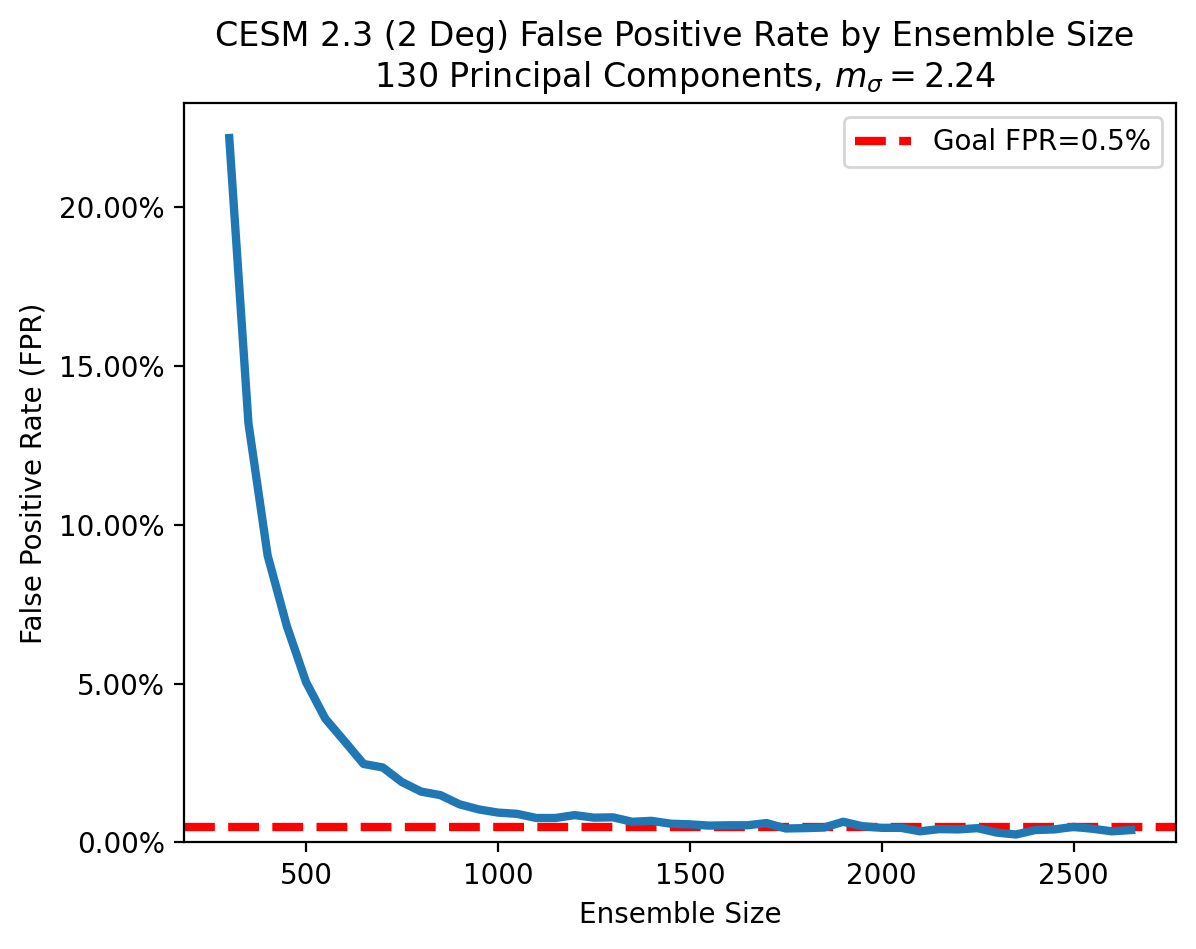

In [32]:
long_sample_sizes, long_fpr_by_ensemble_size = run_fpr_tests(
    twodeg_folder, twodeg_file_prefix, '', 7, twodeg_timesteps, 130, 300, new_m, title=title
)

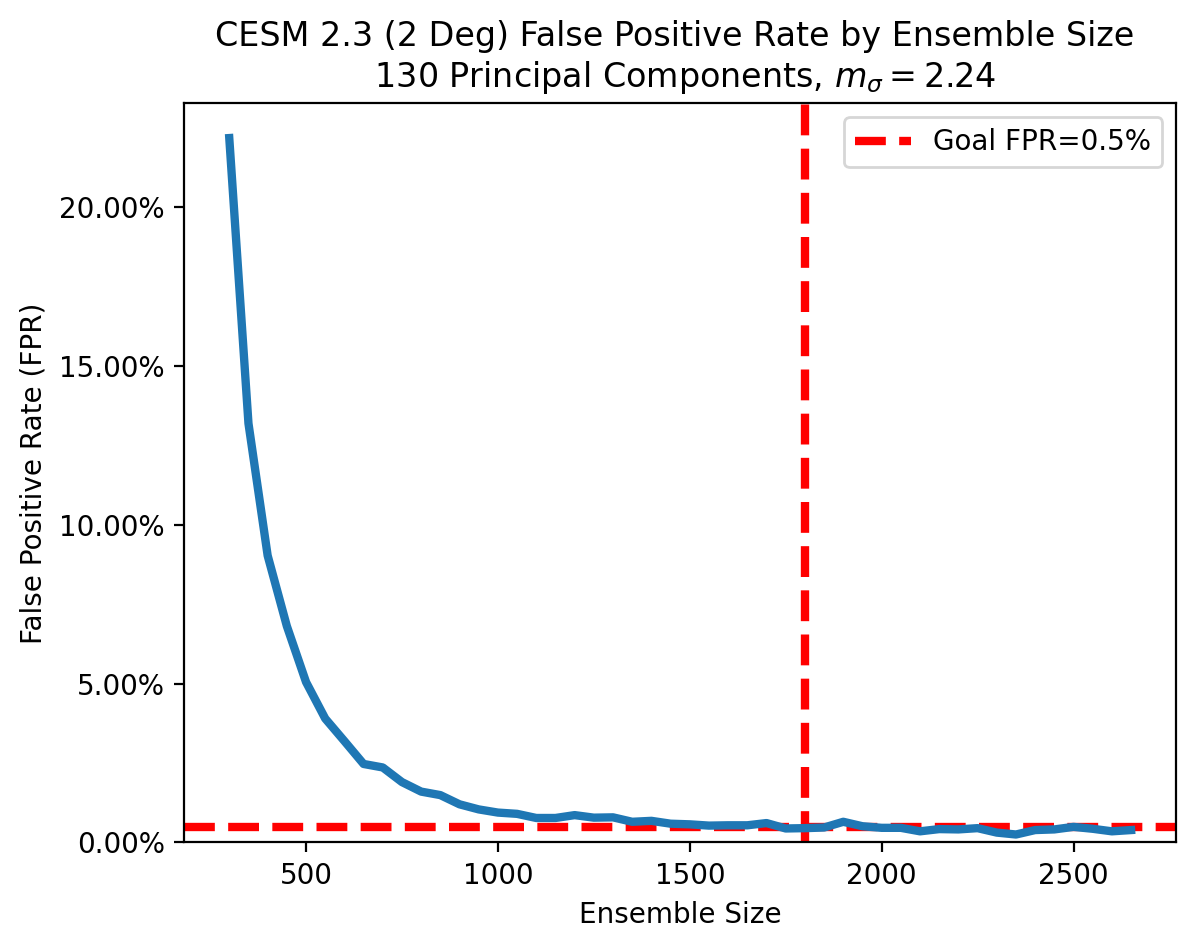

In [33]:
plot_fpr_tests(long_sample_sizes, long_fpr_by_ensemble_size, title, 1800)

# CESM 1deg

In [16]:
onedeg_folder = "../data/CESM_2_3_2750_1deg_sums"
onedeg_file_prefix = "cesm23_2750_1deg_sum_"
onedeg_file_suffix = ""

In [17]:
# This set does not include initial conditions

onedeg_all_standard_means, onedeg_timesteps, onedeg_shared_vars = read_summary_series(
    onedeg_folder, onedeg_file_prefix, onedeg_file_suffix, 1, 1
)

0: 256 vars
1: 255 vars
2: 271 vars
3: 253 vars
4: 268 vars
5: 253 vars
6: 268 vars
7: 253 vars
8: 267 vars
9: 253 vars
10: 268 vars
11: 252 vars
12: 266 vars
13: 251 vars
14: 267 vars
15: 252 vars
16: 268 vars
17: 246 vars
223 shared variables


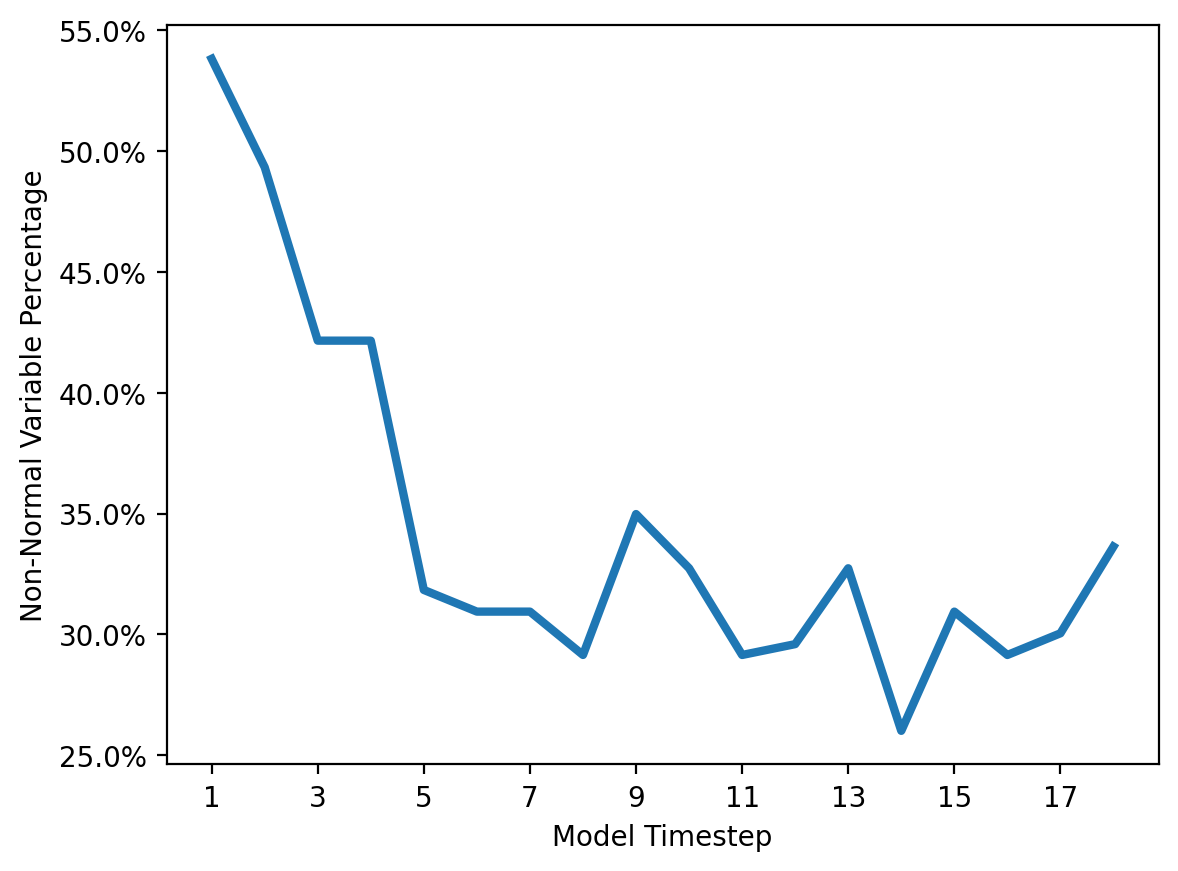

In [17]:
onedeg_shapiro_timesteps, onedeg_non_normal_vars_percentage = shapiro_wilks_over_time(
    onedeg_all_standard_means, onedeg_timesteps, onedeg_shared_vars
)

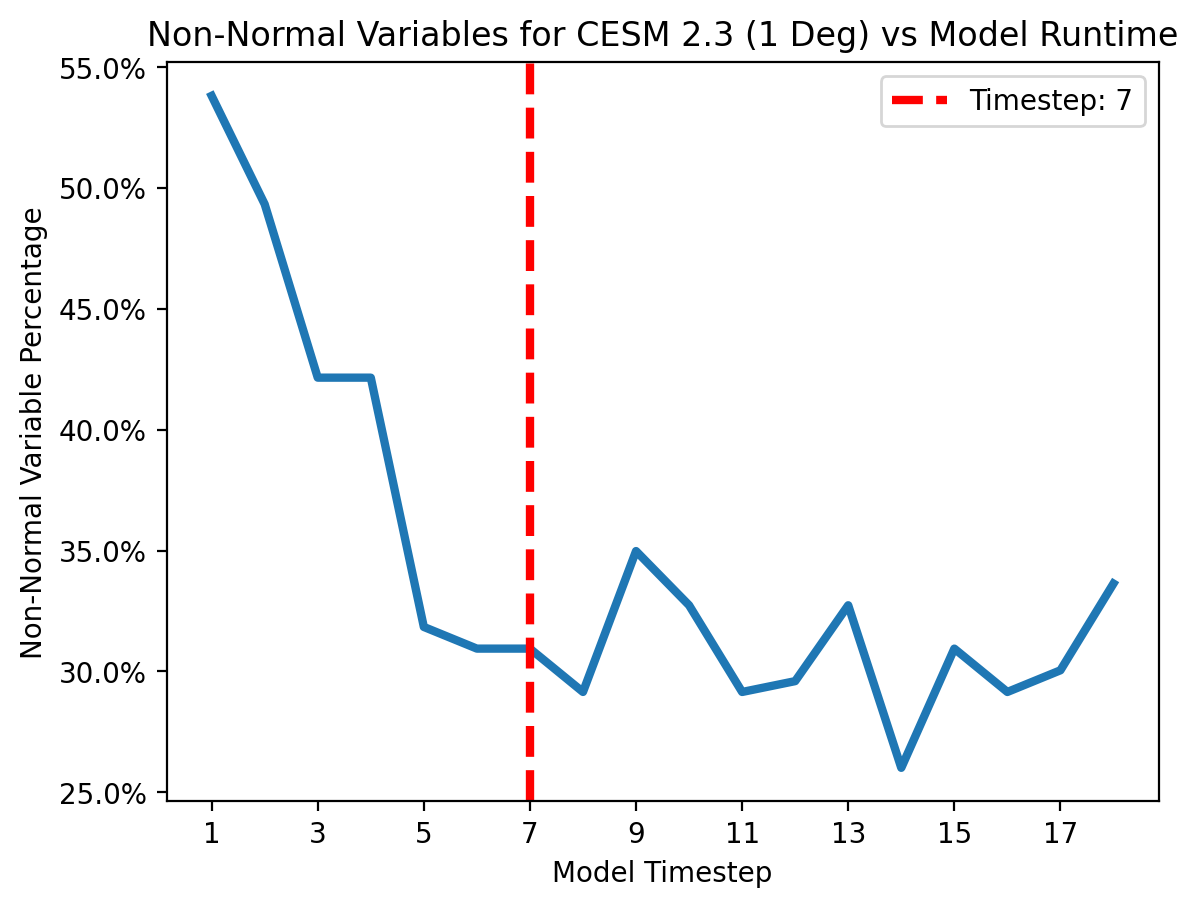

In [21]:
title = "Non-Normal Variables for CESM 2.3 (1 Deg) vs Model Runtime"
mark_timestep = 7
plot_shapiro_wilks_over_time(
    onedeg_shapiro_timesteps,
    onedeg_non_normal_vars_percentage,
    title=title,
    mark_timestep=mark_timestep,
)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
[105, 110, 115, 116, 120, 120, 121, 124, 124, 127, 126, 127, 128, 128, 129, 129, 129, 130, 131, 131, 131, 131, 132, 132, 132, 132, 132]


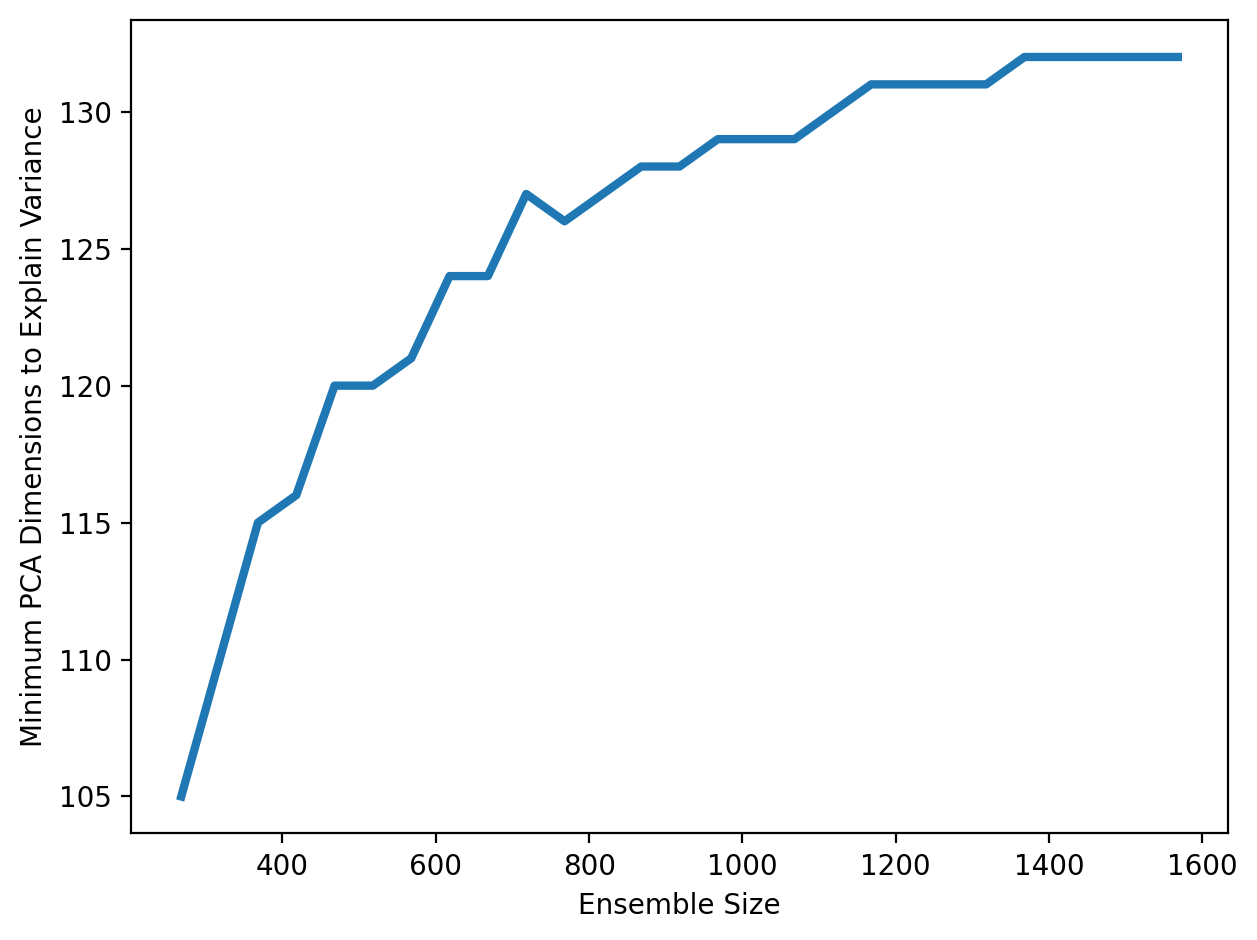

In [20]:
onedeg_sample_sizes, onedeg_min_pca_included = stable_PCs_required(
    onedeg_folder, onedeg_file_prefix, '', 7, onedeg_timesteps, 0.95
)

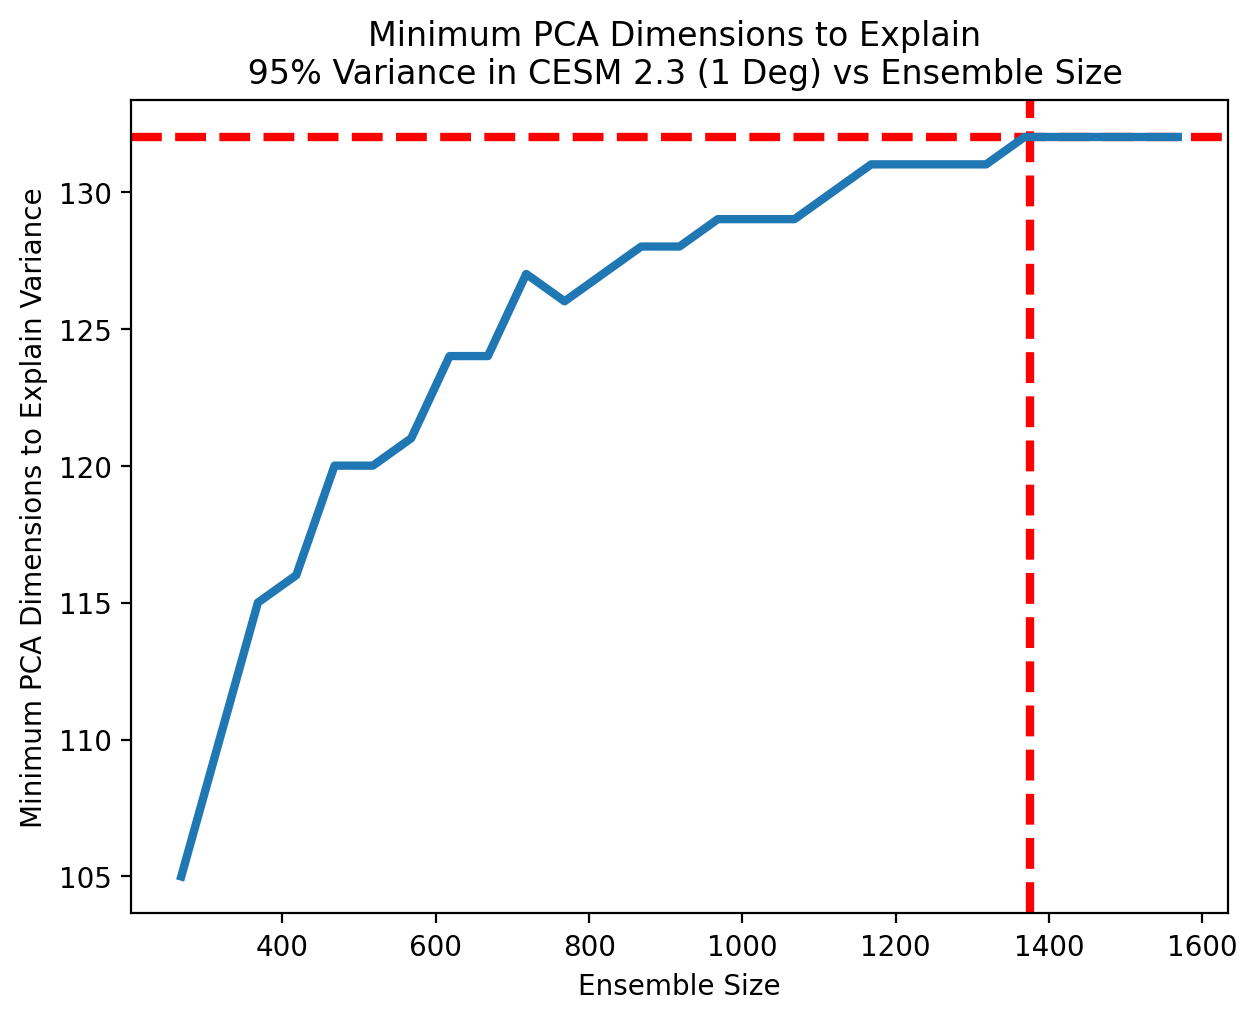

In [25]:
title = "Minimum PCA Dimensions to Explain \n 95% Variance in CESM 2.3 (1 Deg) vs Ensemble Size"
plot_stable_PCs(
    onedeg_sample_sizes,
    onedeg_min_pca_included,
    vertical_line=1375,
    horizontal_line=132,
    title=title,
)

In [45]:
# How much variance is explained by 130 PC dimensions
var_explained_at_fixed_pc(
    onedeg_folder, onedeg_file_prefix, onedeg_file_suffix, 7, onedeg_timesteps, 1400, 130
)

0.9478528156084192


In [17]:
new_m = find_theoretical_m(133, 0.002)
new_m

2.2417154931256125

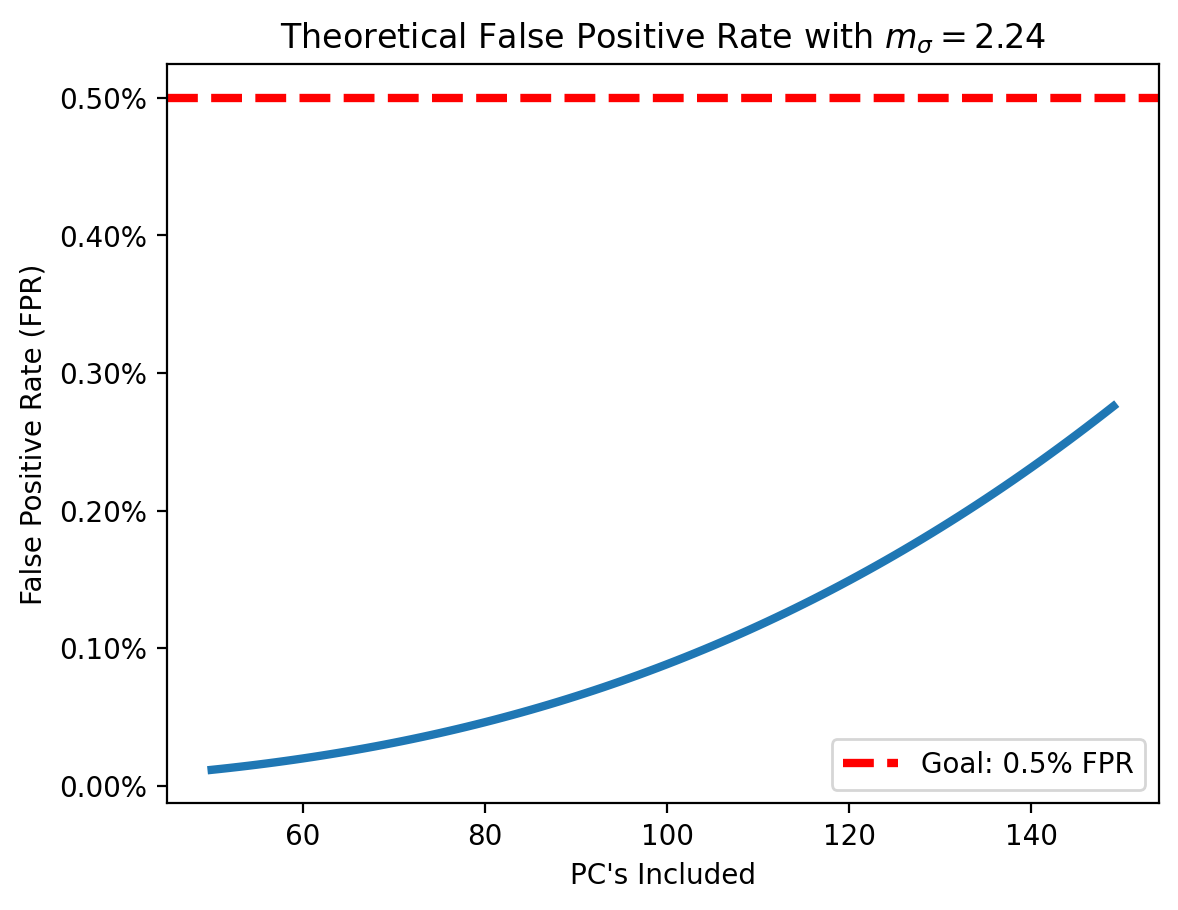

In [18]:
theorectical_fpr_high = theoretical_fpr_range(50, 150, new_m)
pca_vals = list(range(50, 150))
plt.plot(pca_vals, theorectical_fpr_high)
plt.axhline(y=0.005, label="Goal: 0.5% FPR", color="red", linestyle="dashed")
plt.title(fr"Theoretical False Positive Rate with $m_\sigma = {new_m:.2f}$")
plt.xlabel("PC's Included")
plt.ylabel("False Positive Rate (FPR)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


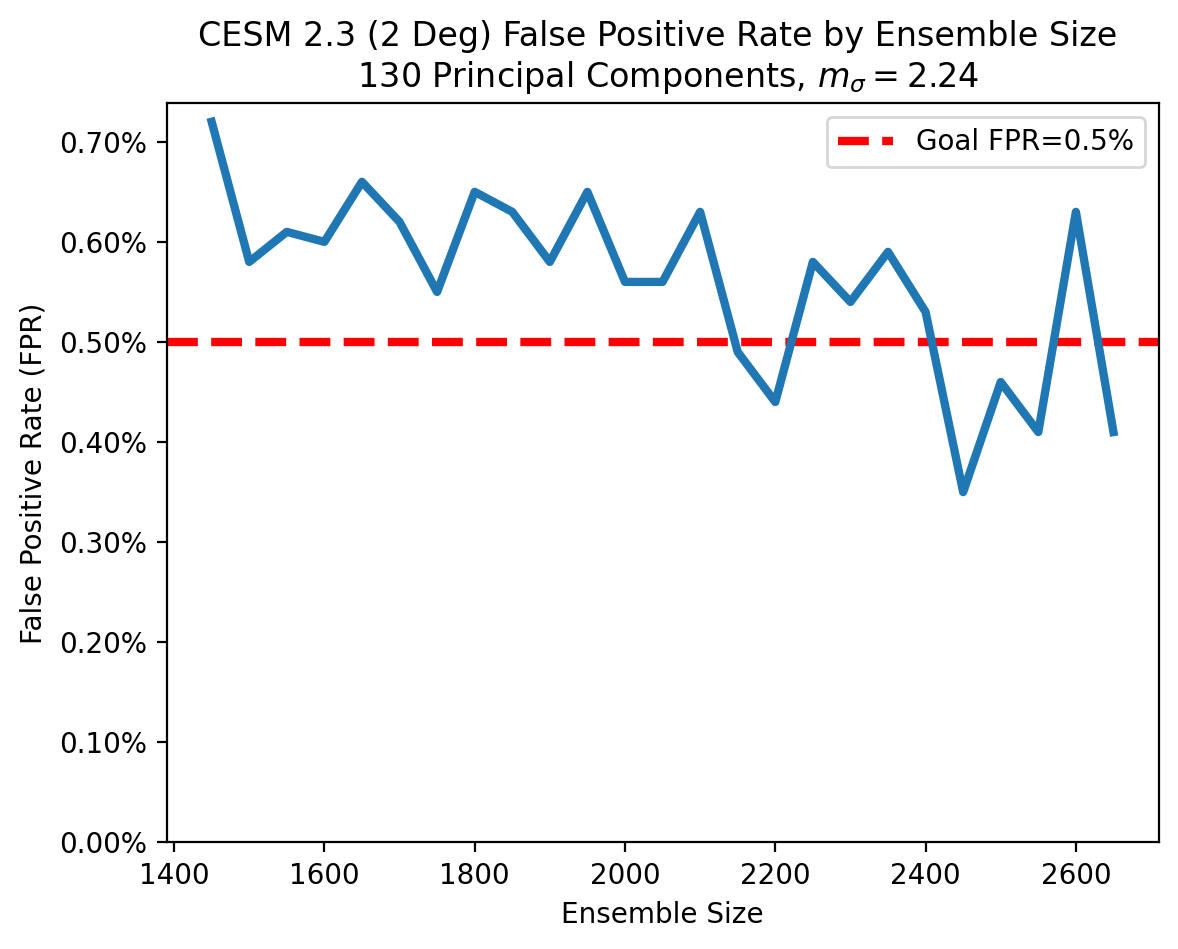

In [36]:
title = f"CESM 2.3 (1 Deg) False Positive Rate by Ensemble Size \n 130 Principal Components, $m_\\sigma = {new_m:.2f}$"
onedeg_sample_sizes, onedeg_fpr_by_ensemble_size = run_fpr_tests(
    onedeg_folder, onedeg_file_prefix, '', 7, onedeg_timesteps, 130, 1450, new_m, title=title
)

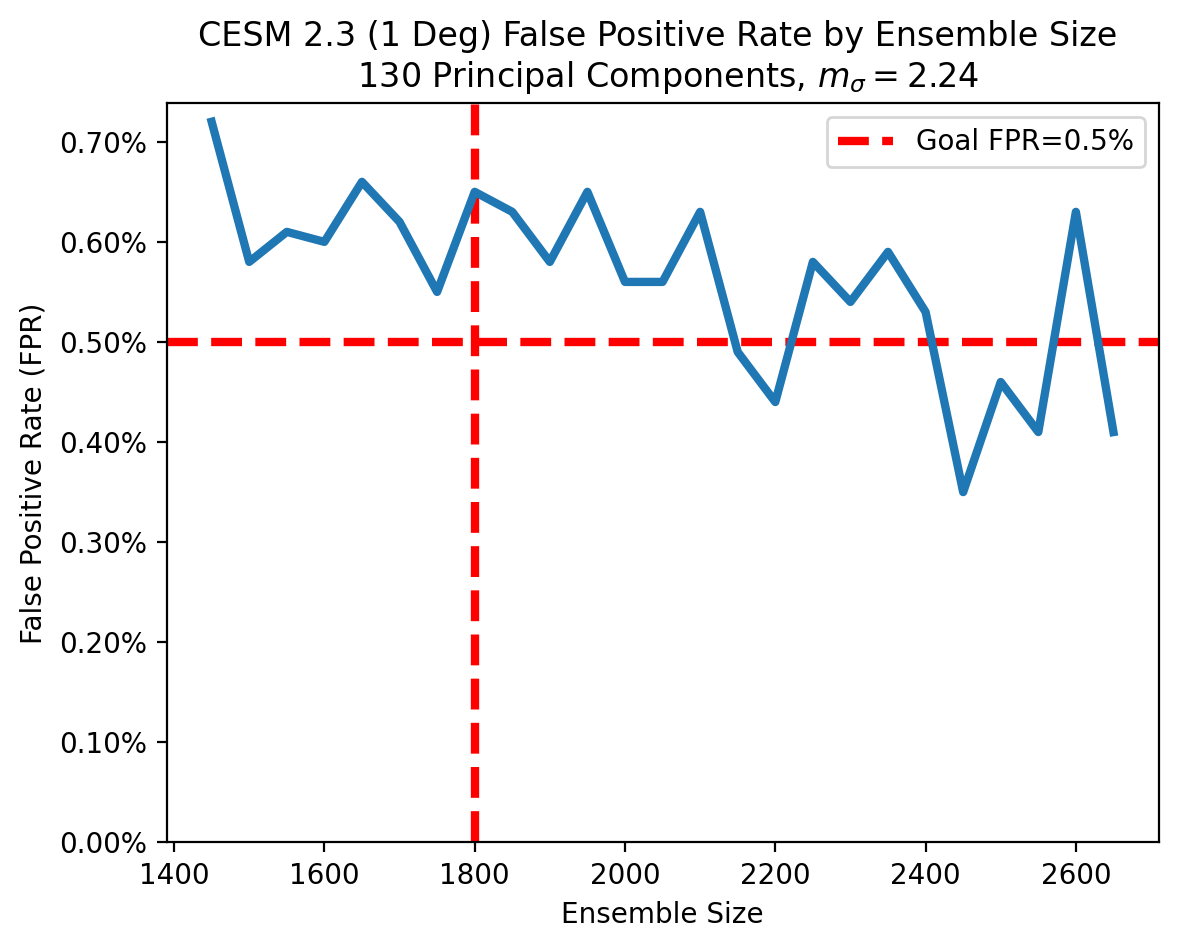

In [38]:
title = f"CESM 2.3 (1 Deg) False Positive Rate by Ensemble Size \n 130 Principal Components, $m_\\sigma = {new_m:.2f}$"
plot_fpr_tests(onedeg_sample_sizes, onedeg_fpr_by_ensemble_size, title, 1800)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


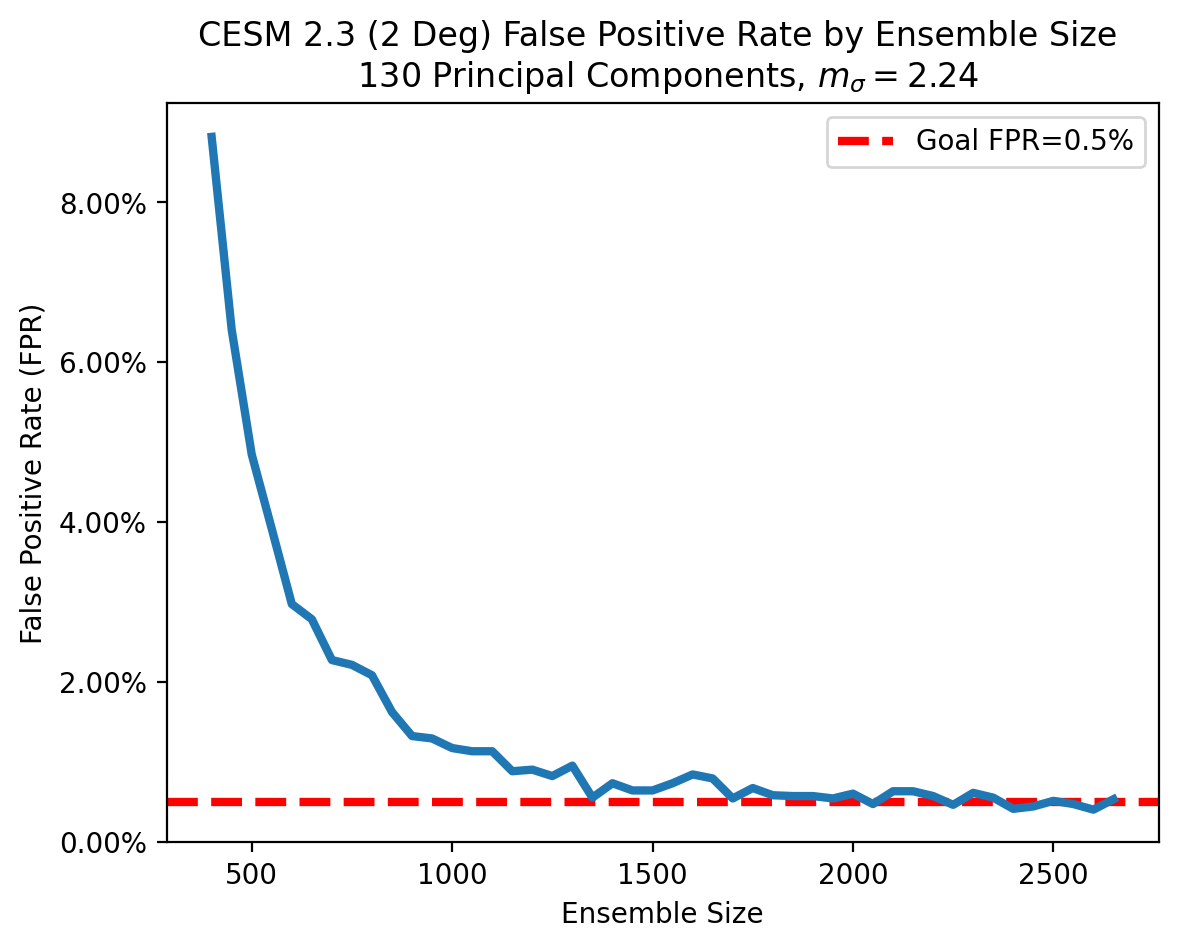

In [37]:
onedeg_long_sample_sizes, onedeg_long_fpr_by_ensemble_size = run_fpr_tests(
    onedeg_folder, onedeg_file_prefix, '', 7, onedeg_timesteps, 130, 400, new_m, title=title
)

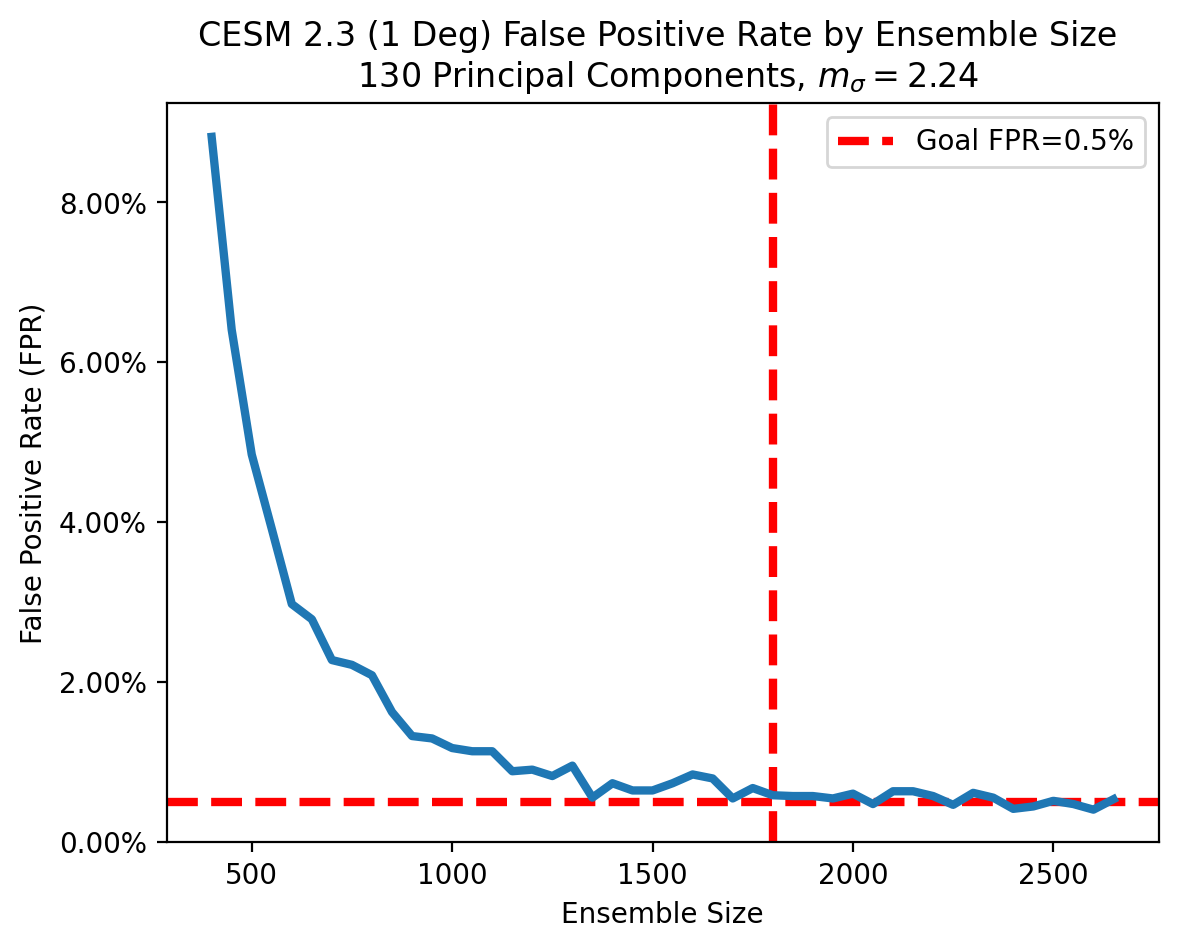

In [39]:
plot_fpr_tests(onedeg_long_sample_sizes, onedeg_long_fpr_by_ensemble_size, title, 1800)

# MPAS-A

In [27]:
folder = "../data/MPAS_no_pv_430_sums"
file_prefix = "mpas_sum_430_slice_3x"
file_suffix = ".nc"
first_timestep = 3
save_interval = 3

all_standard_means, timesteps, shared_vars = read_summary_series(
    folder, file_prefix, file_suffix, first_timestep, save_interval
)

0: 43 vars
1: 43 vars
2: 43 vars
3: 43 vars
4: 43 vars
5: 43 vars
6: 43 vars
7: 43 vars
8: 43 vars
9: 43 vars
10: 43 vars
11: 43 vars
12: 43 vars
13: 43 vars
14: 43 vars
15: 43 vars
43 shared variables


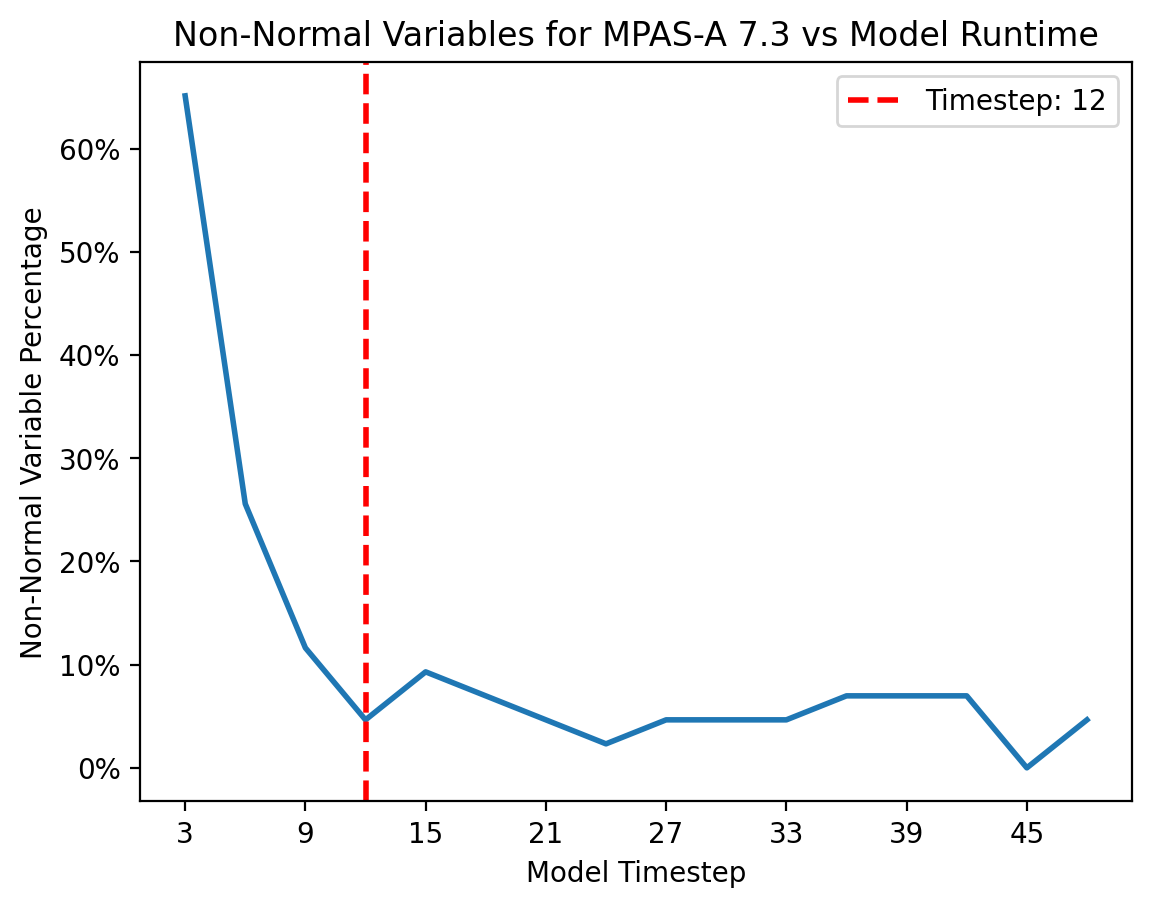

([3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48],
 array([0.65116279, 0.25581395, 0.11627907, 0.04651163, 0.09302326,
        0.06976744, 0.04651163, 0.02325581, 0.04651163, 0.04651163,
        0.04651163, 0.06976744, 0.06976744, 0.06976744, 0.        ,
        0.04651163]))

In [28]:
shapiro_wilks_over_time(
    all_standard_means,
    timesteps,
    shared_vars,
    title="Non-Normal Variables for MPAS-A 7.3 vs Model Runtime",
    mark_timestep=12,
)

1
2
3
4
5
6
7
[20, 24, 25, 26, 26, 26, 26, 26]


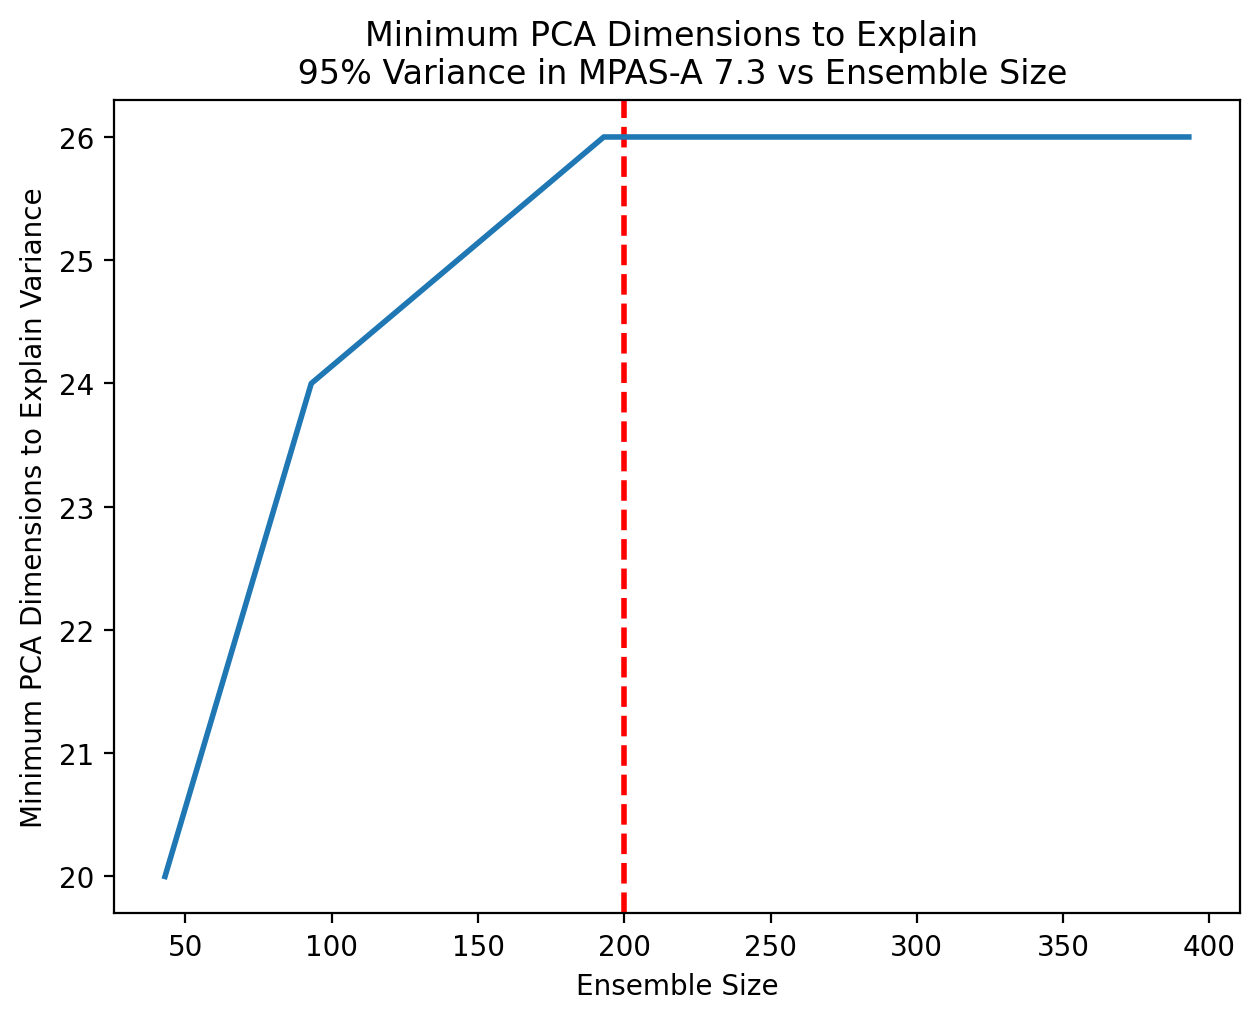

([43, 93, 143, 193, 243, 293, 343, 393], [20, 24, 25, 26, 26, 26, 26, 26])

In [29]:
title = "Minimum PCA Dimensions to Explain \n 95% Variance in MPAS-A 7.3 vs Ensemble Size"
stable_PCs_required(
    folder, file_prefix, file_suffix, 12, timesteps, 0.95, title=title, vertical_line=200
)

0
1
2
3


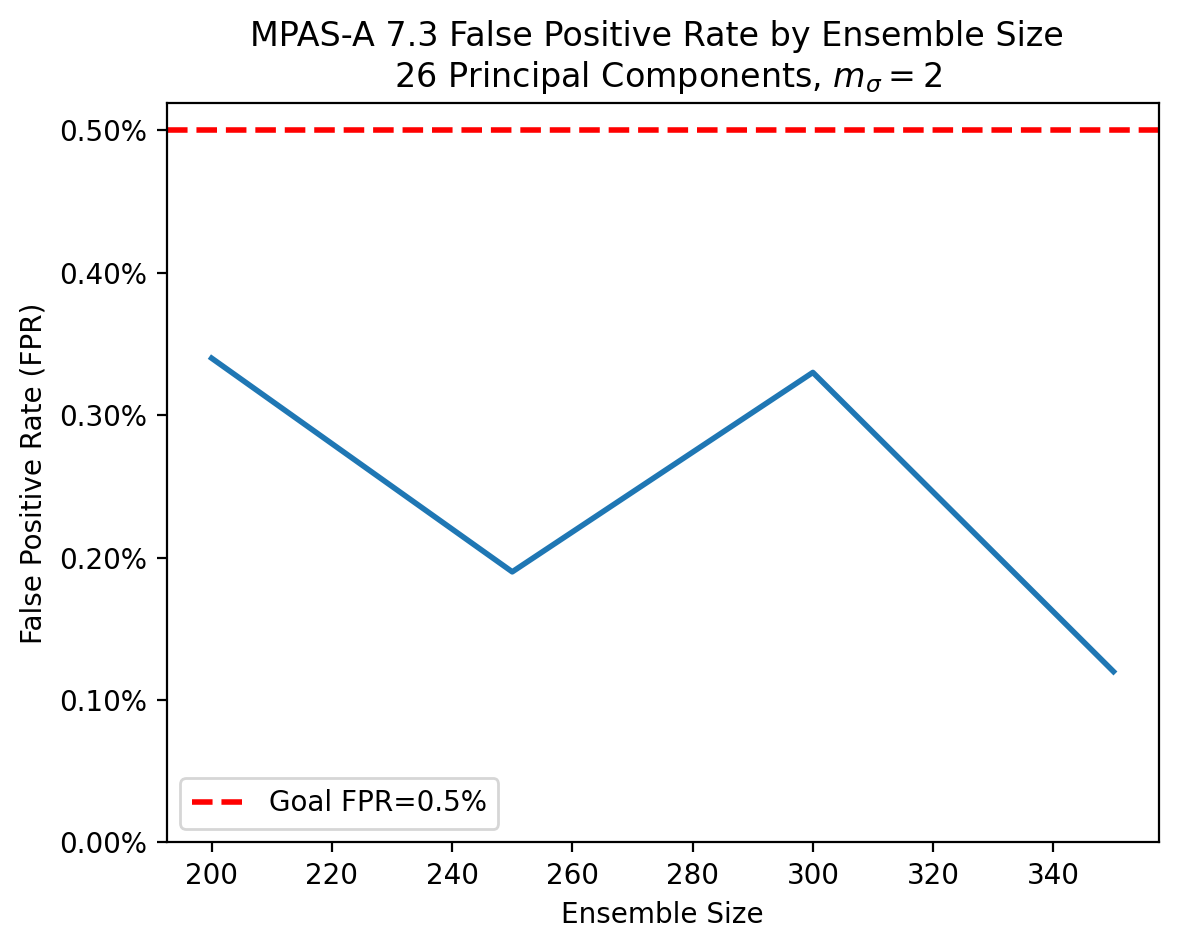

([200, 250, 300, 350], array([0.0034, 0.0019, 0.0033, 0.0012]))

In [30]:
title = (
    f"MPAS-A 7.3 False Positive Rate by Ensemble Size \n 26 Principal Components, $m_\\sigma = 2$"
)
run_fpr_tests(folder, file_prefix, file_suffix, 12, timesteps, 26, 200, 2, title=title)

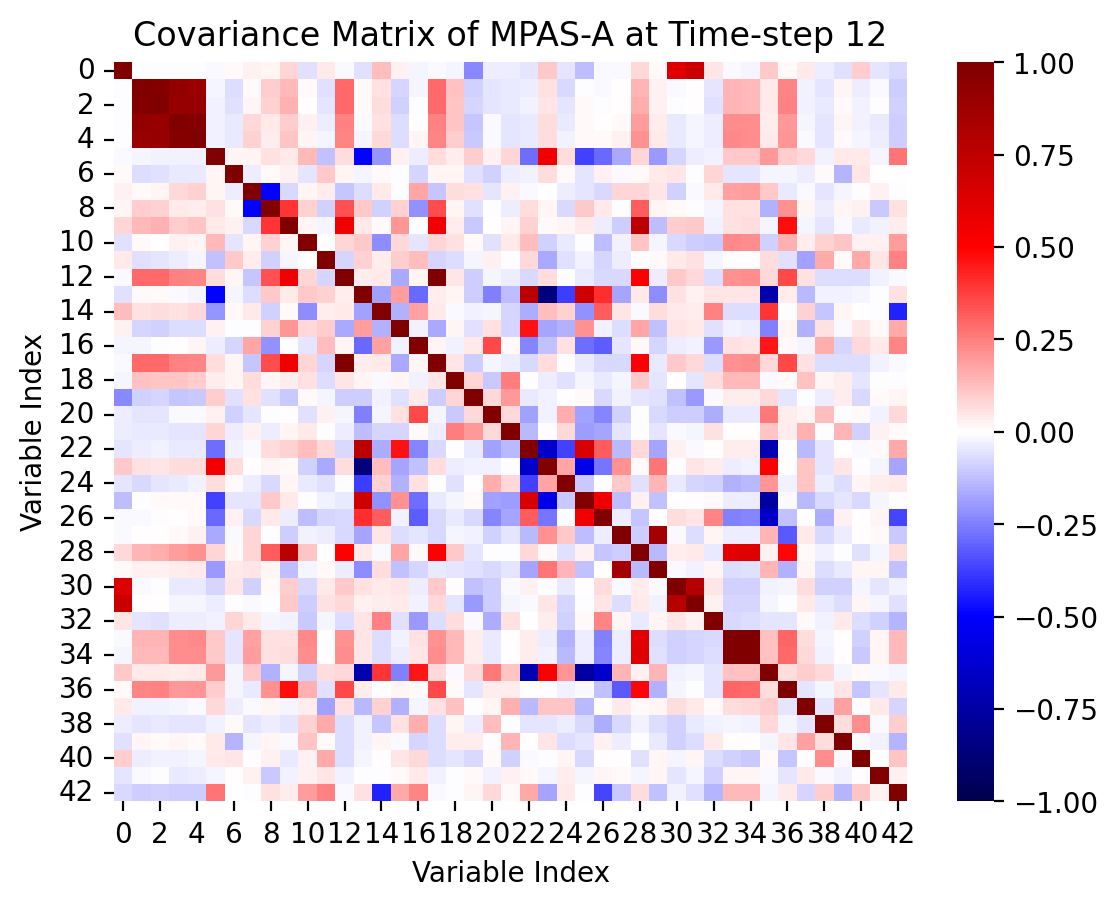

array([[ 1.        , -0.00572196, -0.00611788, ...,  0.09521633,
        -0.05171301, -0.07056842],
       [-0.00572196,  1.        ,  0.98378304, ..., -0.03476302,
        -0.01313133, -0.09848692],
       [-0.00611788,  0.98378304,  1.        , ..., -0.03081898,
        -0.00383118, -0.09139986],
       ...,
       [ 0.09521633, -0.03476302, -0.03081898, ...,  1.        ,
         0.00697624,  0.11353871],
       [-0.05171301, -0.01313133, -0.00383118, ...,  0.00697624,
         1.        ,  0.02958879],
       [-0.07056842, -0.09848692, -0.09139986, ...,  0.11353871,
         0.02958879,  1.        ]])

In [24]:
make_cov_plot(
    all_standard_means, timesteps, 12, title="Covariance Matrix of MPAS-A at Time-step 12"
)

/var/folders/_z/7wbb99d96hb4l2w95ymyxg280000gn/T/ipykernel_2005/3861227645.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


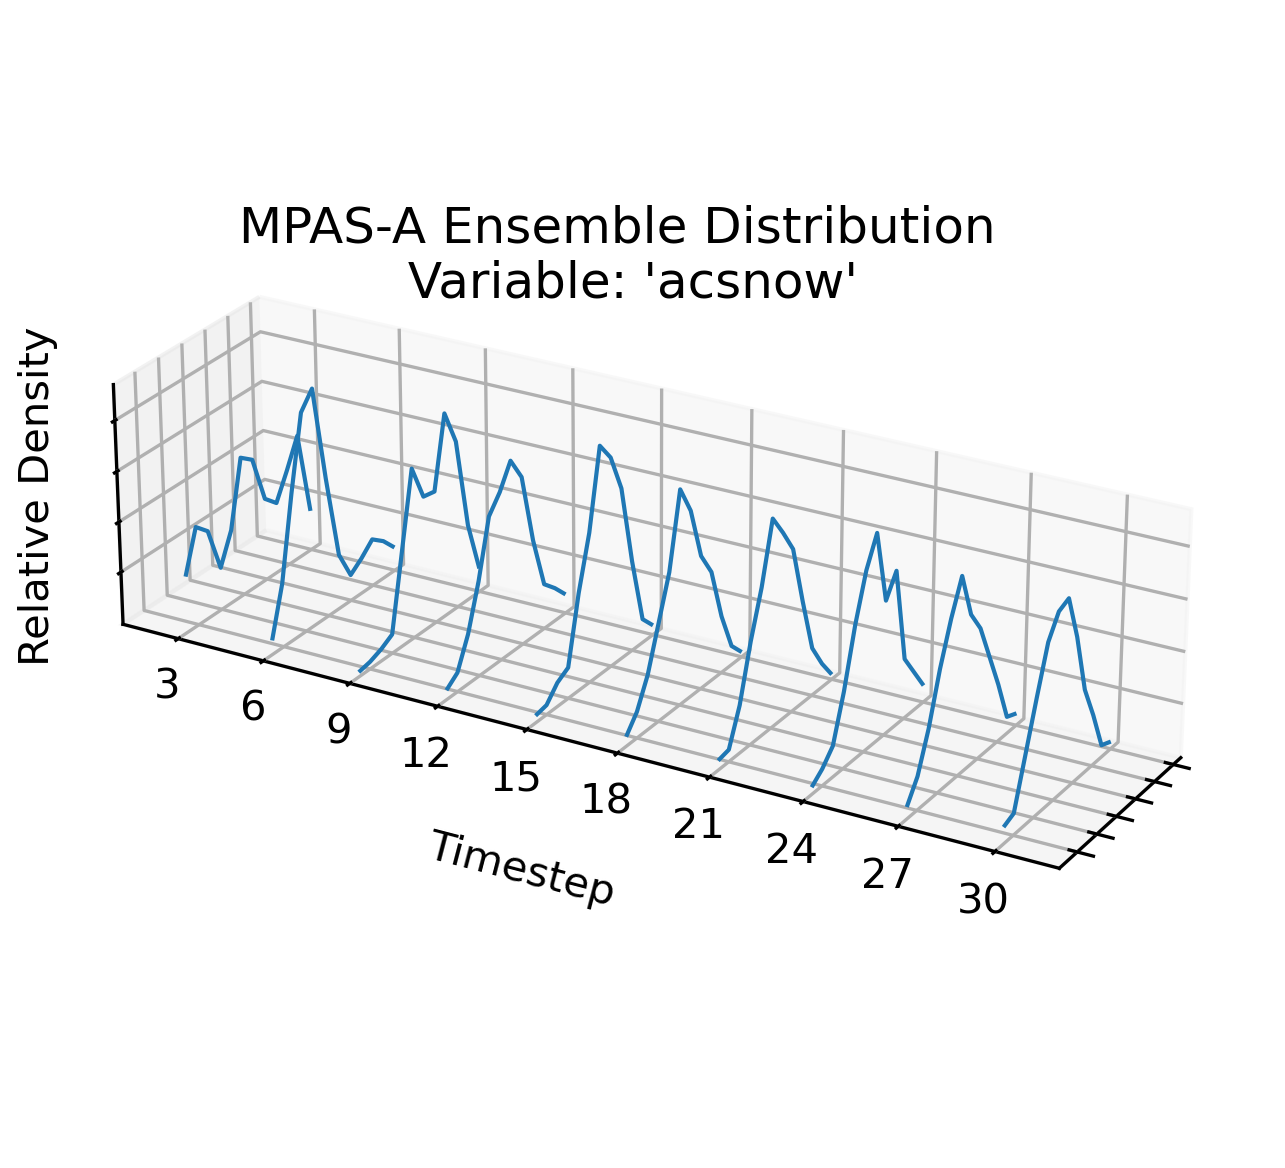

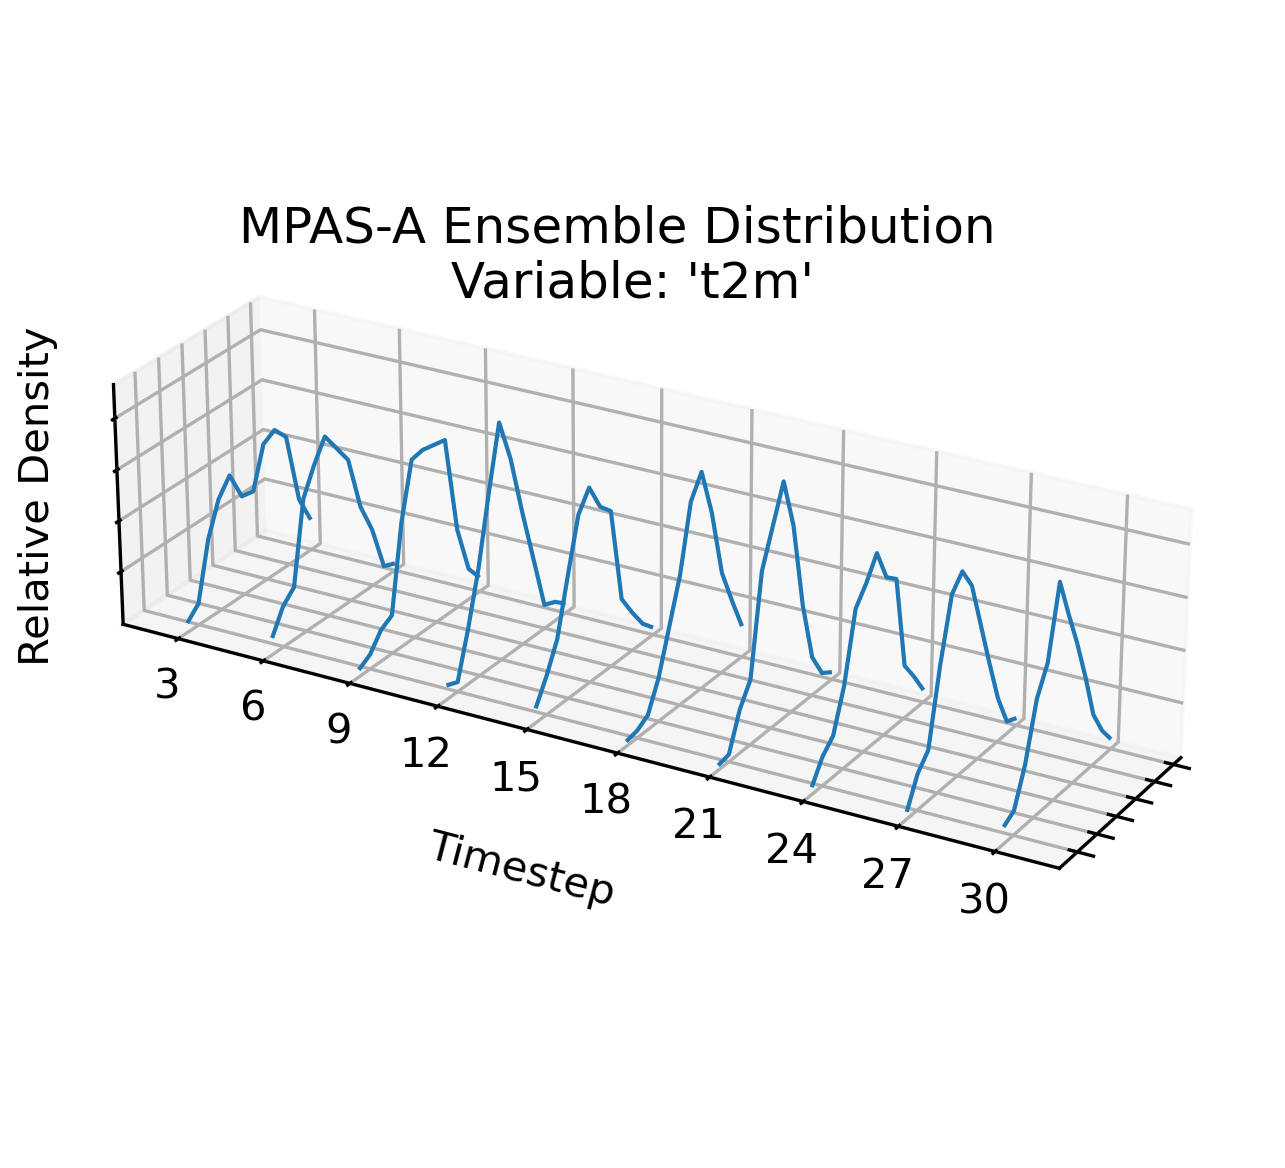

In [26]:
var_1 = b'acsnow                '
var_2 = b't2m                   '
plot_ensemble_spread(all_standard_means, timesteps[:10], shared_vars, var_1, title="")
plot_ensemble_spread(all_standard_means, timesteps[:10], shared_vars, var_2, title="")

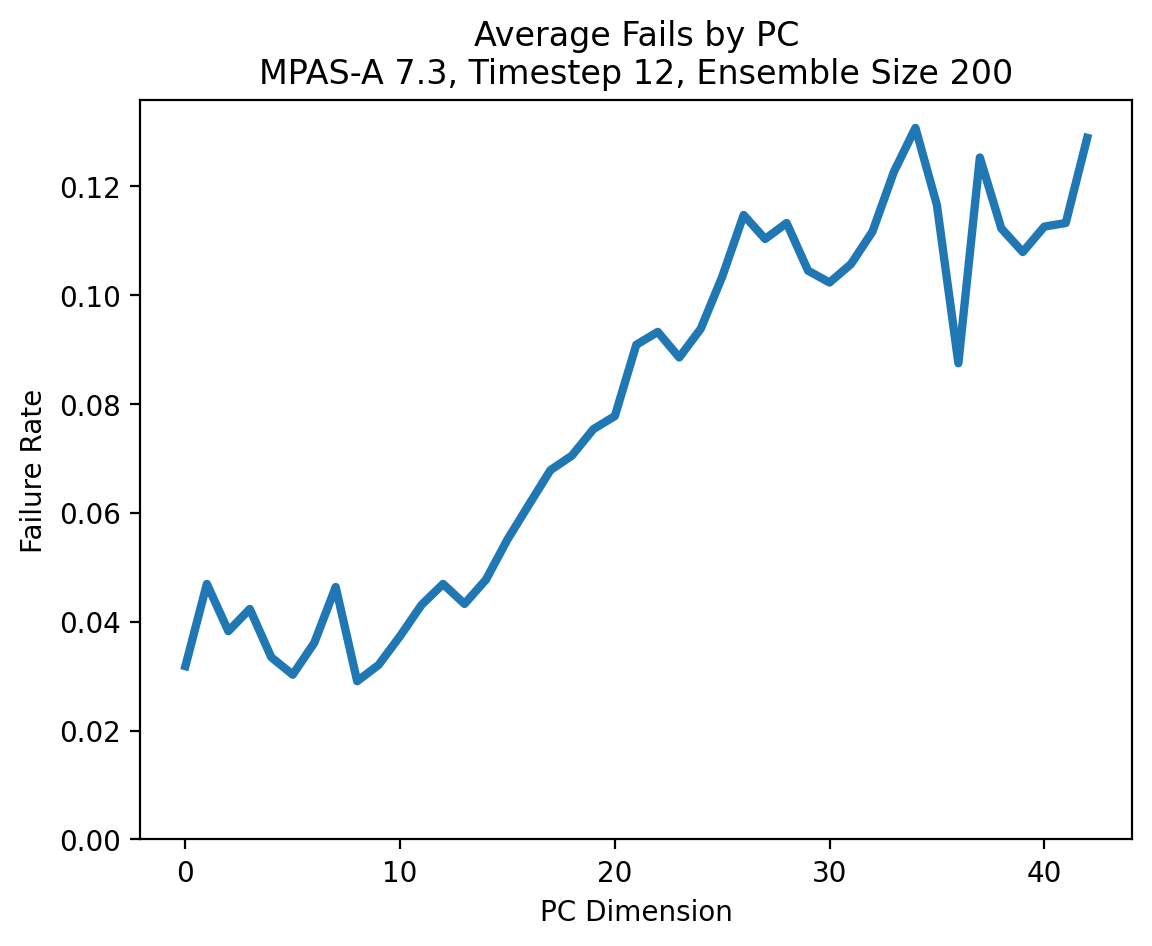

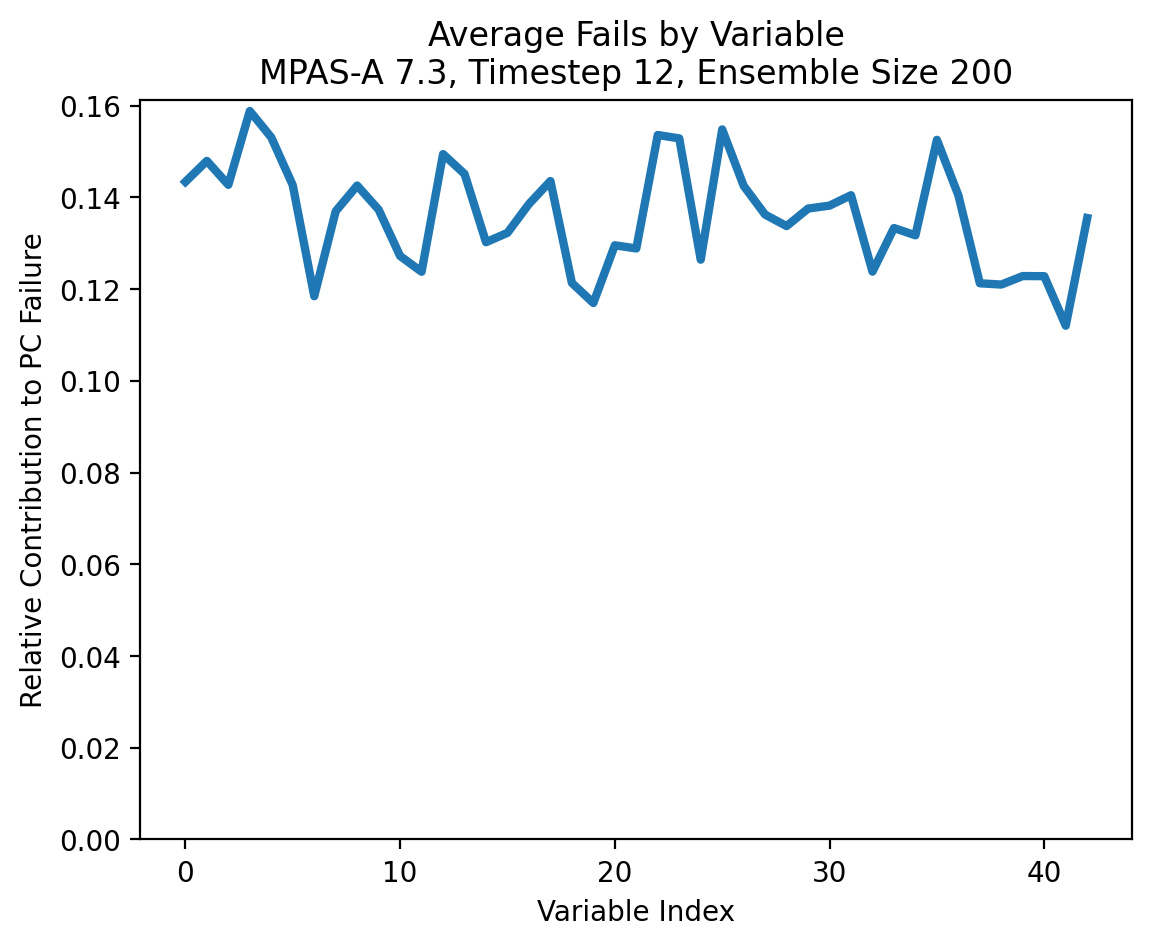

In [40]:
fpr_by_pc_and_var(all_standard_means, 100, 100, 200, timesteps, 12, 2)

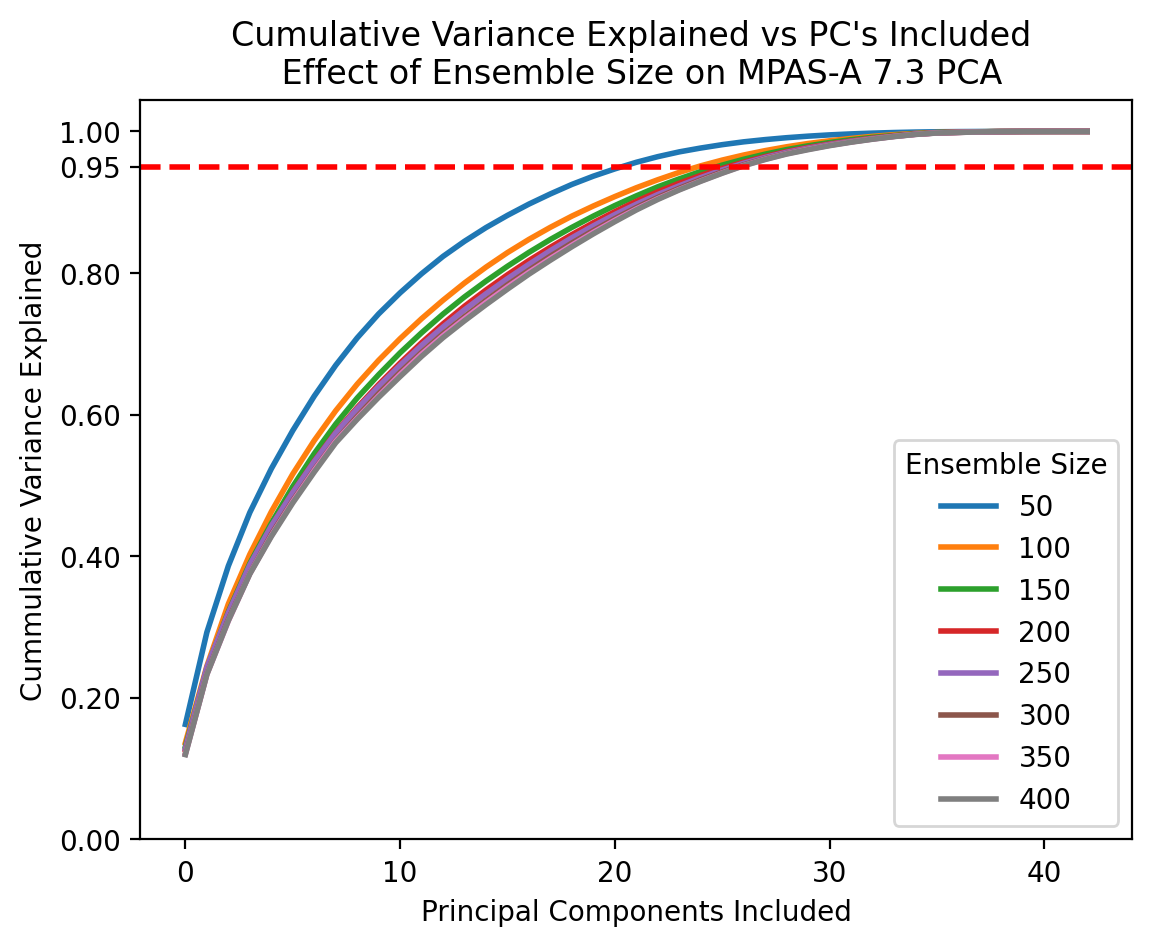

In [32]:
ensemble_sizes = list(range(50, 450, 50))
title = (
    "Cumulative Variance Explained vs PC's Included \n Effect of Ensemble Size on MPAS-A 7.3 PCA"
)
variance_explained_vs_ensemble_size_plot(
    all_standard_means, 10, ensemble_sizes, timesteps, 12, title
)

# Additional Plots For Paper

In [33]:
# effect of latent dimension on PCA bias
n_vars = 50
n_samples = 1000
PCs = np.array(list(range(n_vars, 0, -1)))
bias = np.zeros(n_vars)
rel_bias = np.zeros(n_vars)
for i in range(n_vars):
    temp = 0
    for j in range(n_vars):
        if i != j:
            temp += PCs[j] / (PCs[i] - PCs[j])
    bias[i] = ((temp / n_samples) + 1) * PCs[i] - PCs[i]
    rel_bias[i] = temp / n_samples

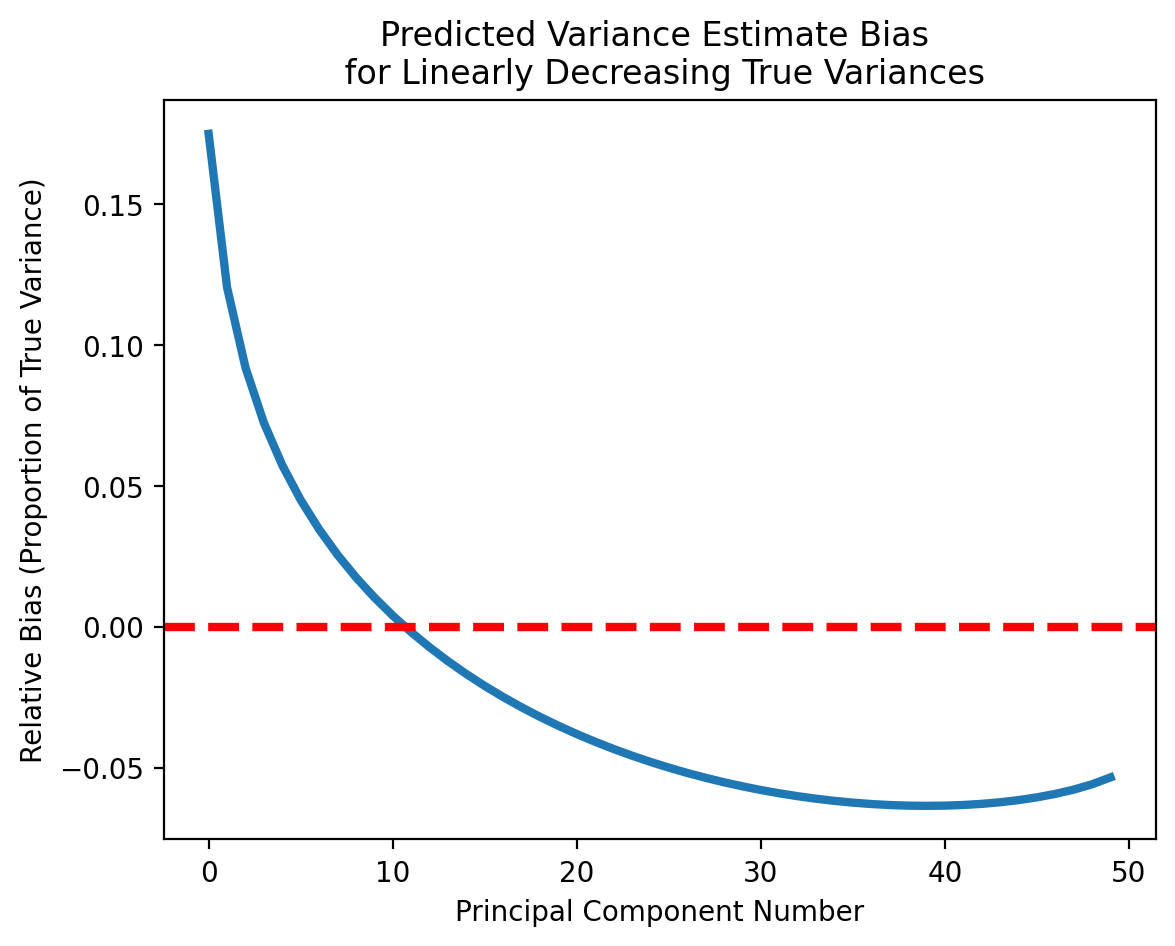

In [34]:
plt.plot(rel_bias)
plt.title("Predicted Variance Estimate Bias \n for Linearly Decreasing True Variances")
plt.xlabel("Principal Component Number")
plt.ylabel("Relative Bias (Proportion of True Variance)")
plt.axhline(y=0, color='red', linestyle='dashed')
plt.show()

In [22]:
# Experimental PCA Bias
folder_name = "../data"
gathered_mpas_means = np.load(f"{folder_name}/MPASA_sample_means.npy")
extracted_vars = np.load(f"{folder_name}/MPASA_sample_variances.npy")
ground_truth_cov = np.cov(gathered_mpas_means[:, :, 5], rowvar=False)
scaled_mpas_means = sklearn.preprocessing.scale(gathered_mpas_means[:, :, 5])
scaled_ground_truth_cov = np.cov(scaled_mpas_means, rowvar=False)

/Users/teopb/miniconda3/envs/numerical/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [23]:
def predicted_pca_bias(true_vals, sample_size):
    bias = np.zeros(len(true_vals))
    for i in range(len(true_vals)):
        temp_bias = 0
        for j in range(len(true_vals)):
            if j != i:
                if (true_vals[i] - true_vals[j]) != 0:
                    temp_bias += true_vals[j] / (true_vals[i] - true_vals[j])

        bias[i] = temp_bias * (true_vals[i] / sample_size)

    return bias


def synthetic_s_bias(test_repeats, sample_size, cov):
    var_len = cov.shape[0]
    bias_data = np.zeros((test_repeats, var_len))
    s_estimated_data = np.zeros((test_repeats, var_len))

    u, s, vh = np.linalg.svd(cov, full_matrices=True)

    for i in range(test_repeats):
        synthetic_samples = np.random.multivariate_normal(np.zeros(var_len), cov, size=sample_size)

        pca_sampled = PCA(svd_solver='full')

        pca_sampled.fit(synthetic_samples)

        s_estimated_data[i, :] = pca_sampled.explained_variance_

        bias_data[i, :] = pca_sampled.explained_variance_ - s

    return s_estimated_data, bias_data


def rel_synthetic_s_bias(test_repeats, sample_size, cov):
    var_len = cov.shape[0]
    bias_data = np.zeros((test_repeats, var_len))
    s_estimated_data = np.zeros((test_repeats, var_len))

    u, s, vh = np.linalg.svd(cov, full_matrices=True)

    for i in range(test_repeats):
        synthetic_samples = np.random.multivariate_normal(np.zeros(var_len), cov, size=sample_size)

        pca_sampled = PCA(svd_solver='full')

        pca_sampled.fit(synthetic_samples)

        s_estimated_data[i, :] = pca_sampled.explained_variance_

        bias_data[i, :] = (pca_sampled.explained_variance_ - s) / np.abs(s)

    return s_estimated_data, bias_data


def anderson_adjustment(estimated_scores, n):
    var_count = len(estimated_scores)
    adjusted_scores = np.zeros(var_count)

    for i in range(var_count):
        dif_term = 0
        for j in range(var_count):
            if j != i:
                dif_term += estimated_scores[j] / (estimated_scores[i] - estimated_scores[j])

        adjusted_scores[i] = estimated_scores[i] * (1 - (1 / n) * dif_term)

    return adjusted_scores


def rel_synthetic_s_anderson_bias(test_repeats, sample_size, cov):
    var_len = cov.shape[0]
    bias_data = np.zeros((test_repeats, var_len))
    s_estimated_data = np.zeros((test_repeats, var_len))

    u, s, vh = np.linalg.svd(cov, full_matrices=True)

    for i in range(test_repeats):
        synthetic_samples = np.random.multivariate_normal(np.zeros(var_len), cov, size=sample_size)

        pca_sampled = PCA(svd_solver='full')

        pca_sampled.fit(synthetic_samples)

        s_estimated_data[i, :] = anderson_adjustment(pca_sampled.explained_variance_, sample_size)

        bias_data[i, :] = (s_estimated_data[i, :] - s) / np.abs(s)

    return s_estimated_data, bias_data

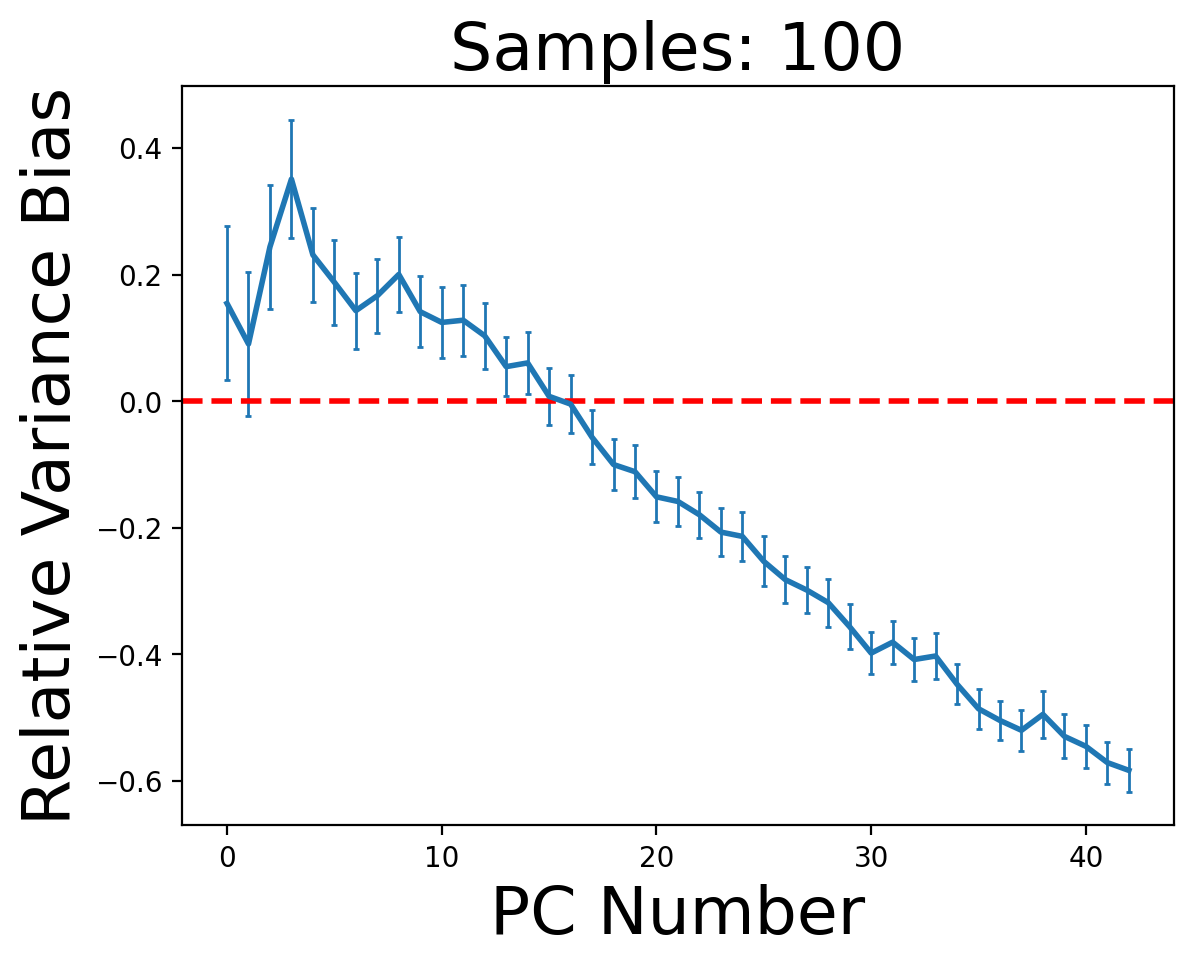

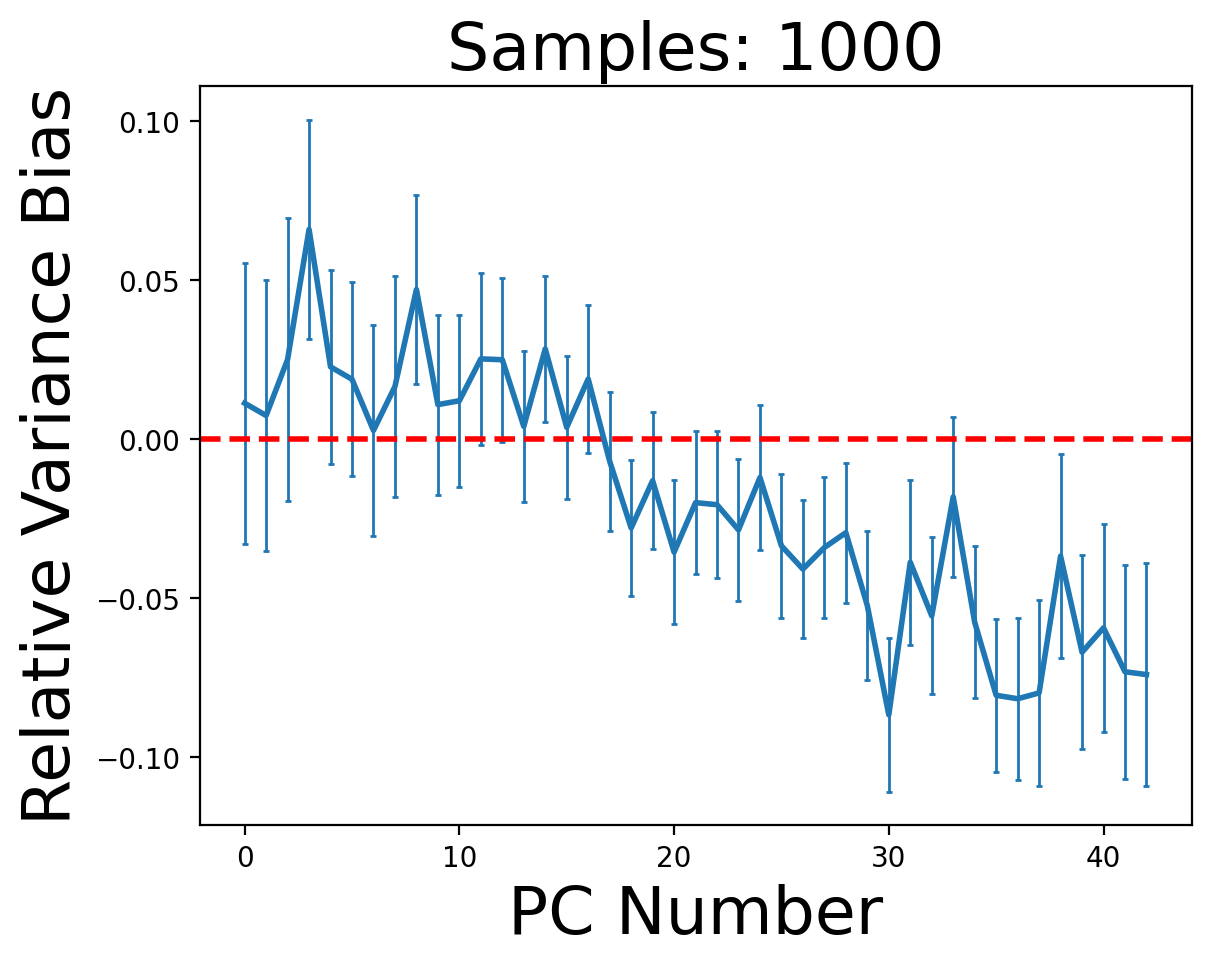

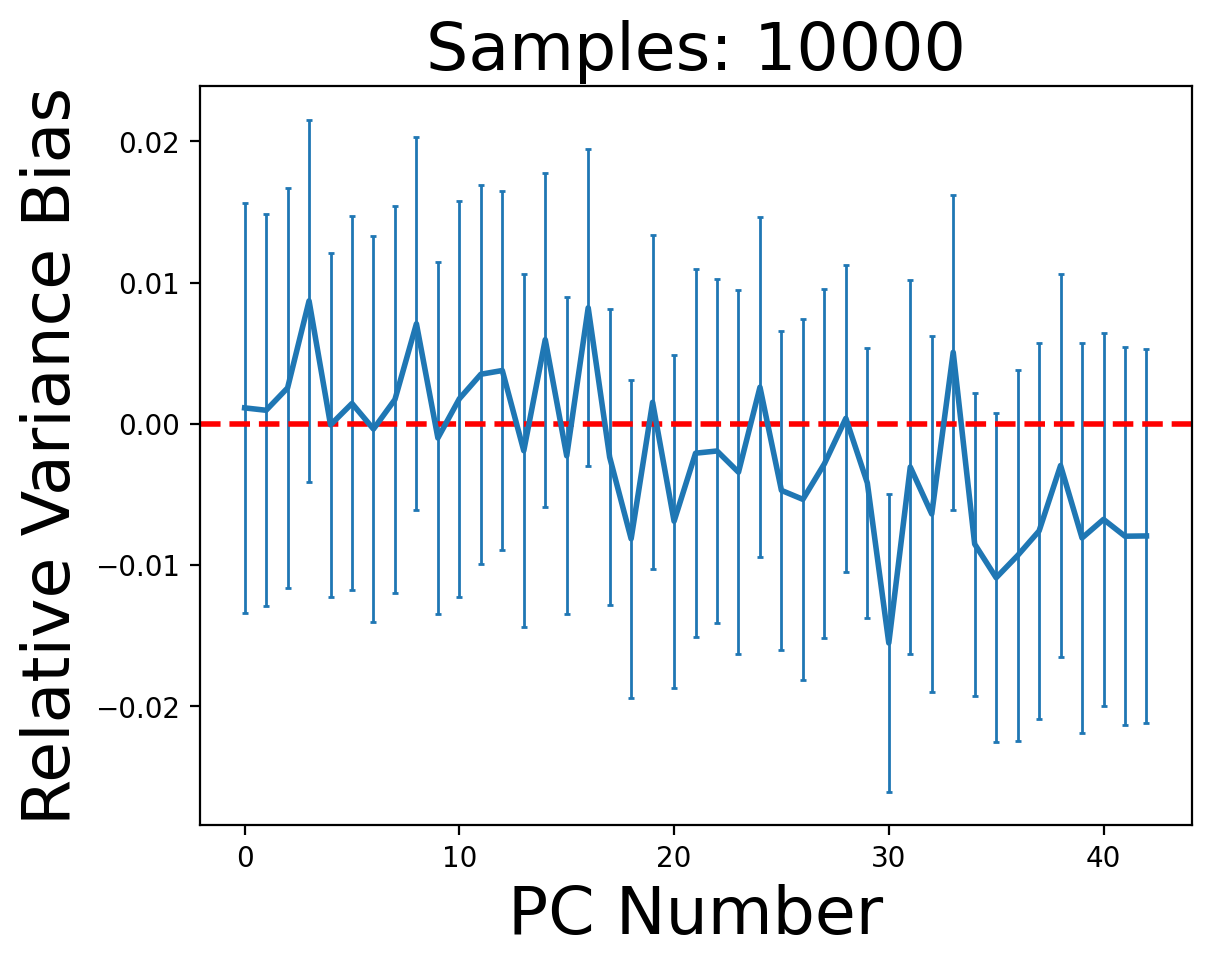

In [26]:
plt.rcParams['lines.linewidth'] = 2
for sample_size in [100, 1000, 10000]:
    test_repeats = 500

    #     Only plot up to the 43 variable dimensions that exclude constant variables etc due to numerical issues with final PCA values
    up_to = 43

    s_syn_anderson, bias_syn_anderson = rel_synthetic_s_anderson_bias(
        test_repeats, sample_size, scaled_ground_truth_cov
    )
    s_syn, bias_syn = rel_synthetic_s_bias(test_repeats, sample_size, scaled_ground_truth_cov)
    plt.errorbar(
        x=list(range(scaled_ground_truth_cov.shape[0])[:up_to]),
        y=np.mean(bias_syn, axis=0)[:up_to],
        yerr=np.std(bias_syn, axis=0)[:up_to],
        label="Standard",
        elinewidth=1,
        capsize=1,
    )

    u, s, vh = np.linalg.svd(scaled_ground_truth_cov, full_matrices=True)
    bias = predicted_pca_bias(s, sample_size)

    plt.title(f"Samples: {str(sample_size)}", fontsize=24)
    plt.xlabel("PC Number", fontsize=24)
    plt.ylabel("Relative Variance Bias", fontsize=24)
    plt.axhline(y=0.0, color="red", linestyle="dashed")
    plt.show()

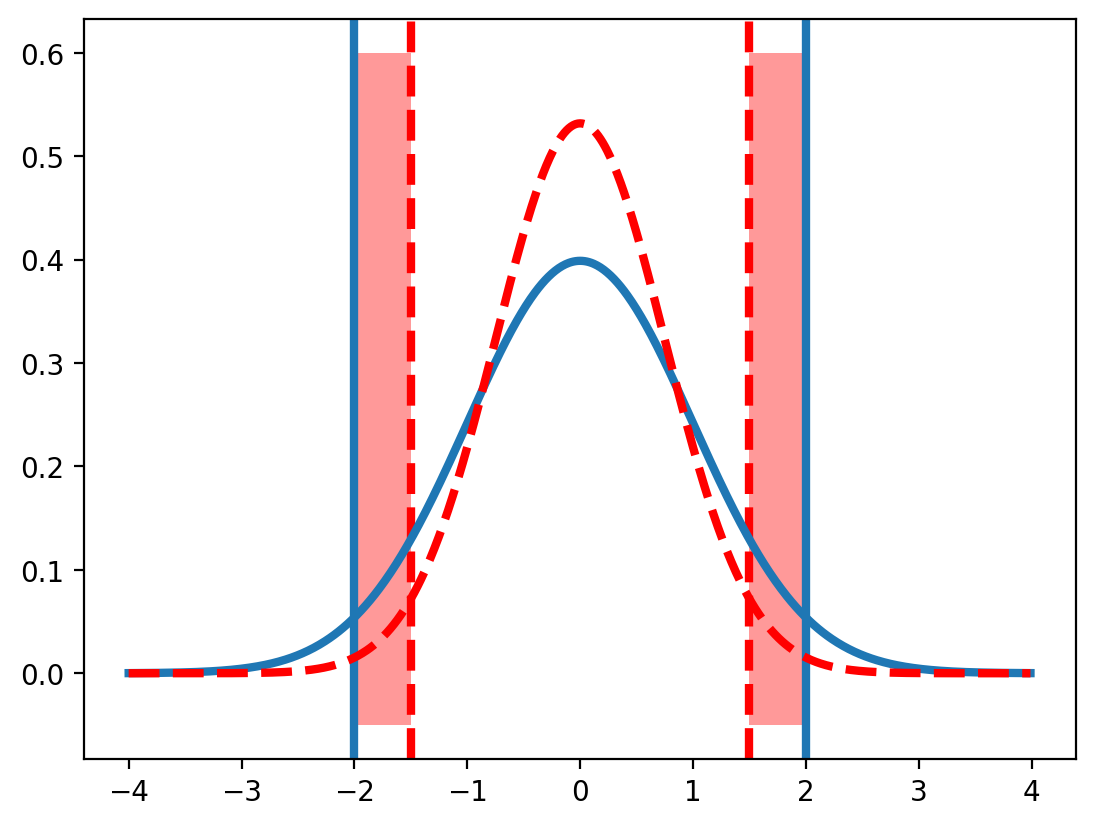

In [23]:
# Theoretical additional failure regions
from scipy.stats import norm

x_axis = np.arange(-4, 4, 0.01)
biased_scale = 0.75
standard_scale = 1

plt.fill_betweenx(
    [-0.05, 0.6],
    x1=-2 * standard_scale,
    x2=-2 * biased_scale,
    facecolor='red',
    alpha=0.4,
    edgecolor='none',
)
plt.fill_betweenx(
    [-0.05, 0.6],
    x1=2 * standard_scale,
    x2=2 * biased_scale,
    facecolor='red',
    alpha=0.4,
    edgecolor='none',
)


plt.axvline(x=2 * standard_scale, color='C0')
plt.axvline(x=2 * biased_scale, color='red', linestyle="dashed")

plt.axvline(x=-2 * standard_scale, color='C0')
plt.axvline(x=-2 * biased_scale, color='red', linestyle="dashed")

plt.plot(x_axis, norm.pdf(x_axis))
plt.plot(x_axis, norm.pdf(x_axis, scale=biased_scale), color='red', linestyle="dashed")

# plt.fill_betweenx([-.05, .6], x1=-2 * standard_scale, x2=-2 * biased_scale, color='red', alpha=.4)

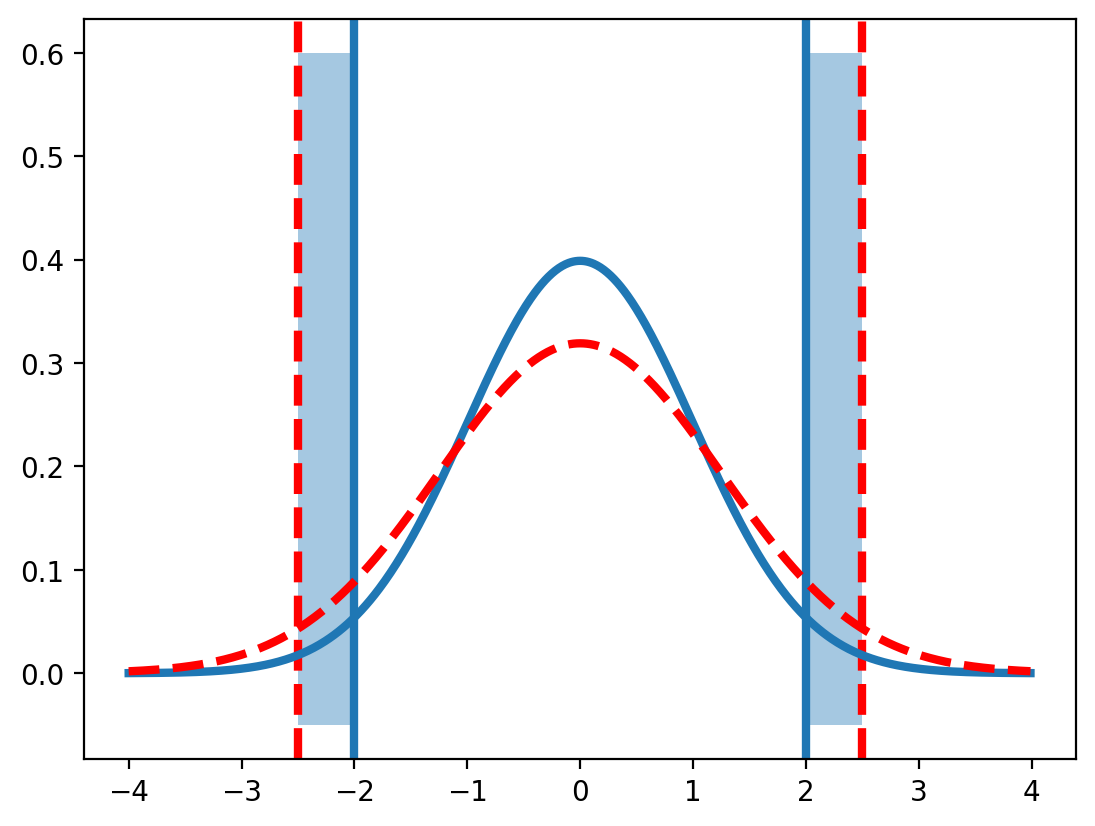

In [26]:
# Theoretical additional failure regions
from scipy.stats import norm

x_axis = np.arange(-4, 4, 0.01)
biased_scale = 1.25
standard_scale = 1

plt.fill_betweenx(
    [-0.05, 0.6],
    x1=-2 * standard_scale,
    x2=-2 * biased_scale,
    facecolor='C0',
    alpha=0.4,
    edgecolor='none',
)
plt.fill_betweenx(
    [-0.05, 0.6],
    x1=2 * standard_scale,
    x2=2 * biased_scale,
    facecolor='C0',
    alpha=0.4,
    edgecolor='none',
)


plt.axvline(x=2 * standard_scale, color='C0')
plt.axvline(x=2 * biased_scale, color='red', linestyle="dashed")

plt.axvline(x=-2 * standard_scale, color='C0')
plt.axvline(x=-2 * biased_scale, color='red', linestyle="dashed")

plt.plot(x_axis, norm.pdf(x_axis))
plt.plot(x_axis, norm.pdf(x_axis, scale=biased_scale), color='red', linestyle="dashed")